<a href="https://colab.research.google.com/github/Udhayaprabhas2904/road-damage-detection/blob/main/Final_Project(Minor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Jan 26 12:49:07 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.0 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/112.6 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NMQ7qsStJY9zYdFT5sb5")
project = rf.workspace("new-workspace-kj87b").project("road-damage-detection-iicdh")
version = project.version(10)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-damage-detection-10 in yolov11:: 100%|██████████| 17184/17184 [00:04<00:00, 3691.13it/s]


In [11]:
dataset.location

'/content/Road-damage-detection-10'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [12]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

In [13]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11s.pt" epochs=80 imgsz=640

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Road-damage-detection-10/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

In [14]:
!ls -l /content/runs/detect/train/

total 11084
-rw-r--r-- 1 root root   1576 Jan 26 13:02 args.yaml
-rw-r--r-- 1 root root 321836 Jan 26 16:39 BoxF1_curve.png
-rw-r--r-- 1 root root 310413 Jan 26 16:39 BoxP_curve.png
-rw-r--r-- 1 root root 316961 Jan 26 16:39 BoxPR_curve.png
-rw-r--r-- 1 root root 314220 Jan 26 16:39 BoxR_curve.png
-rw-r--r-- 1 root root 288751 Jan 26 16:39 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 278180 Jan 26 16:39 confusion_matrix.png
-rw-r--r-- 1 root root 175047 Jan 26 13:02 labels.jpg
-rw-r--r-- 1 root root  14816 Jan 26 16:39 results.csv
-rw-r--r-- 1 root root 253434 Jan 26 16:40 results.png
-rw-r--r-- 1 root root 747564 Jan 26 13:02 train_batch0.jpg
-rw-r--r-- 1 root root 677211 Jan 26 13:02 train_batch1.jpg
-rw-r--r-- 1 root root 627510 Jan 26 16:13 train_batch26250.jpg
-rw-r--r-- 1 root root 641808 Jan 26 16:13 train_batch26251.jpg
-rw-r--r-- 1 root root 583858 Jan 26 16:13 train_batch26252.jpg
-rw-r--r-- 1 root root 690023 Jan 26 13:02 train_batch2.jpg
-rw-r--r-- 1 root root 830

**Step # 05 Examine Training Results**

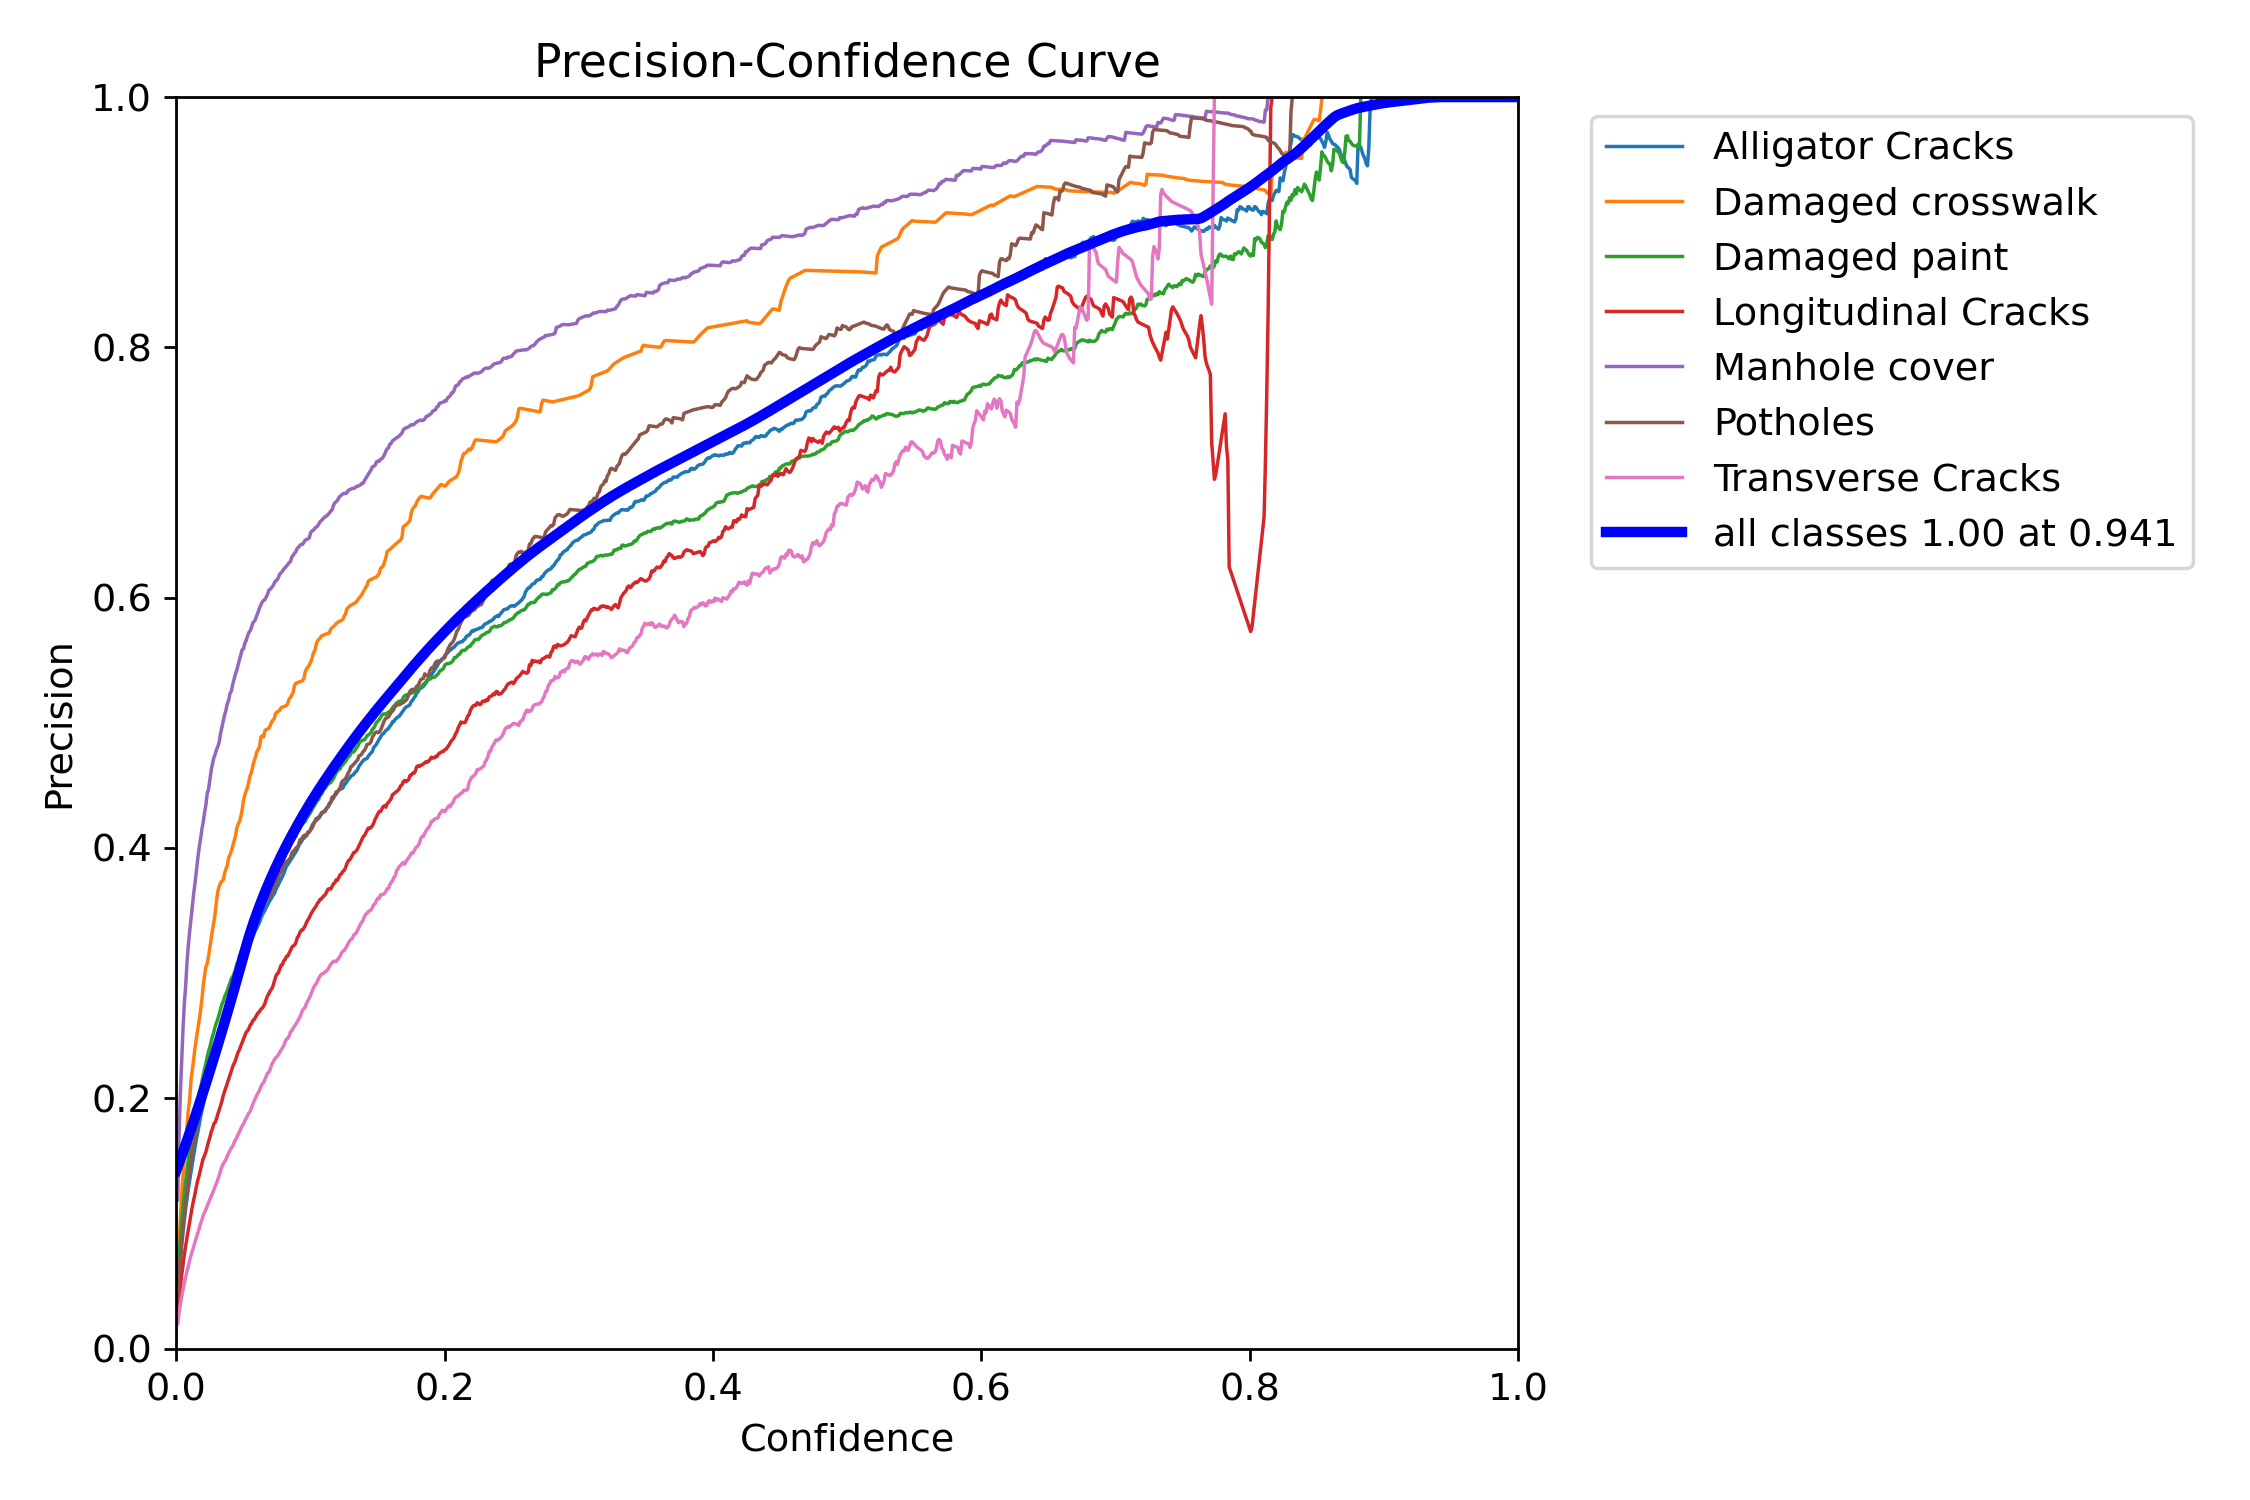

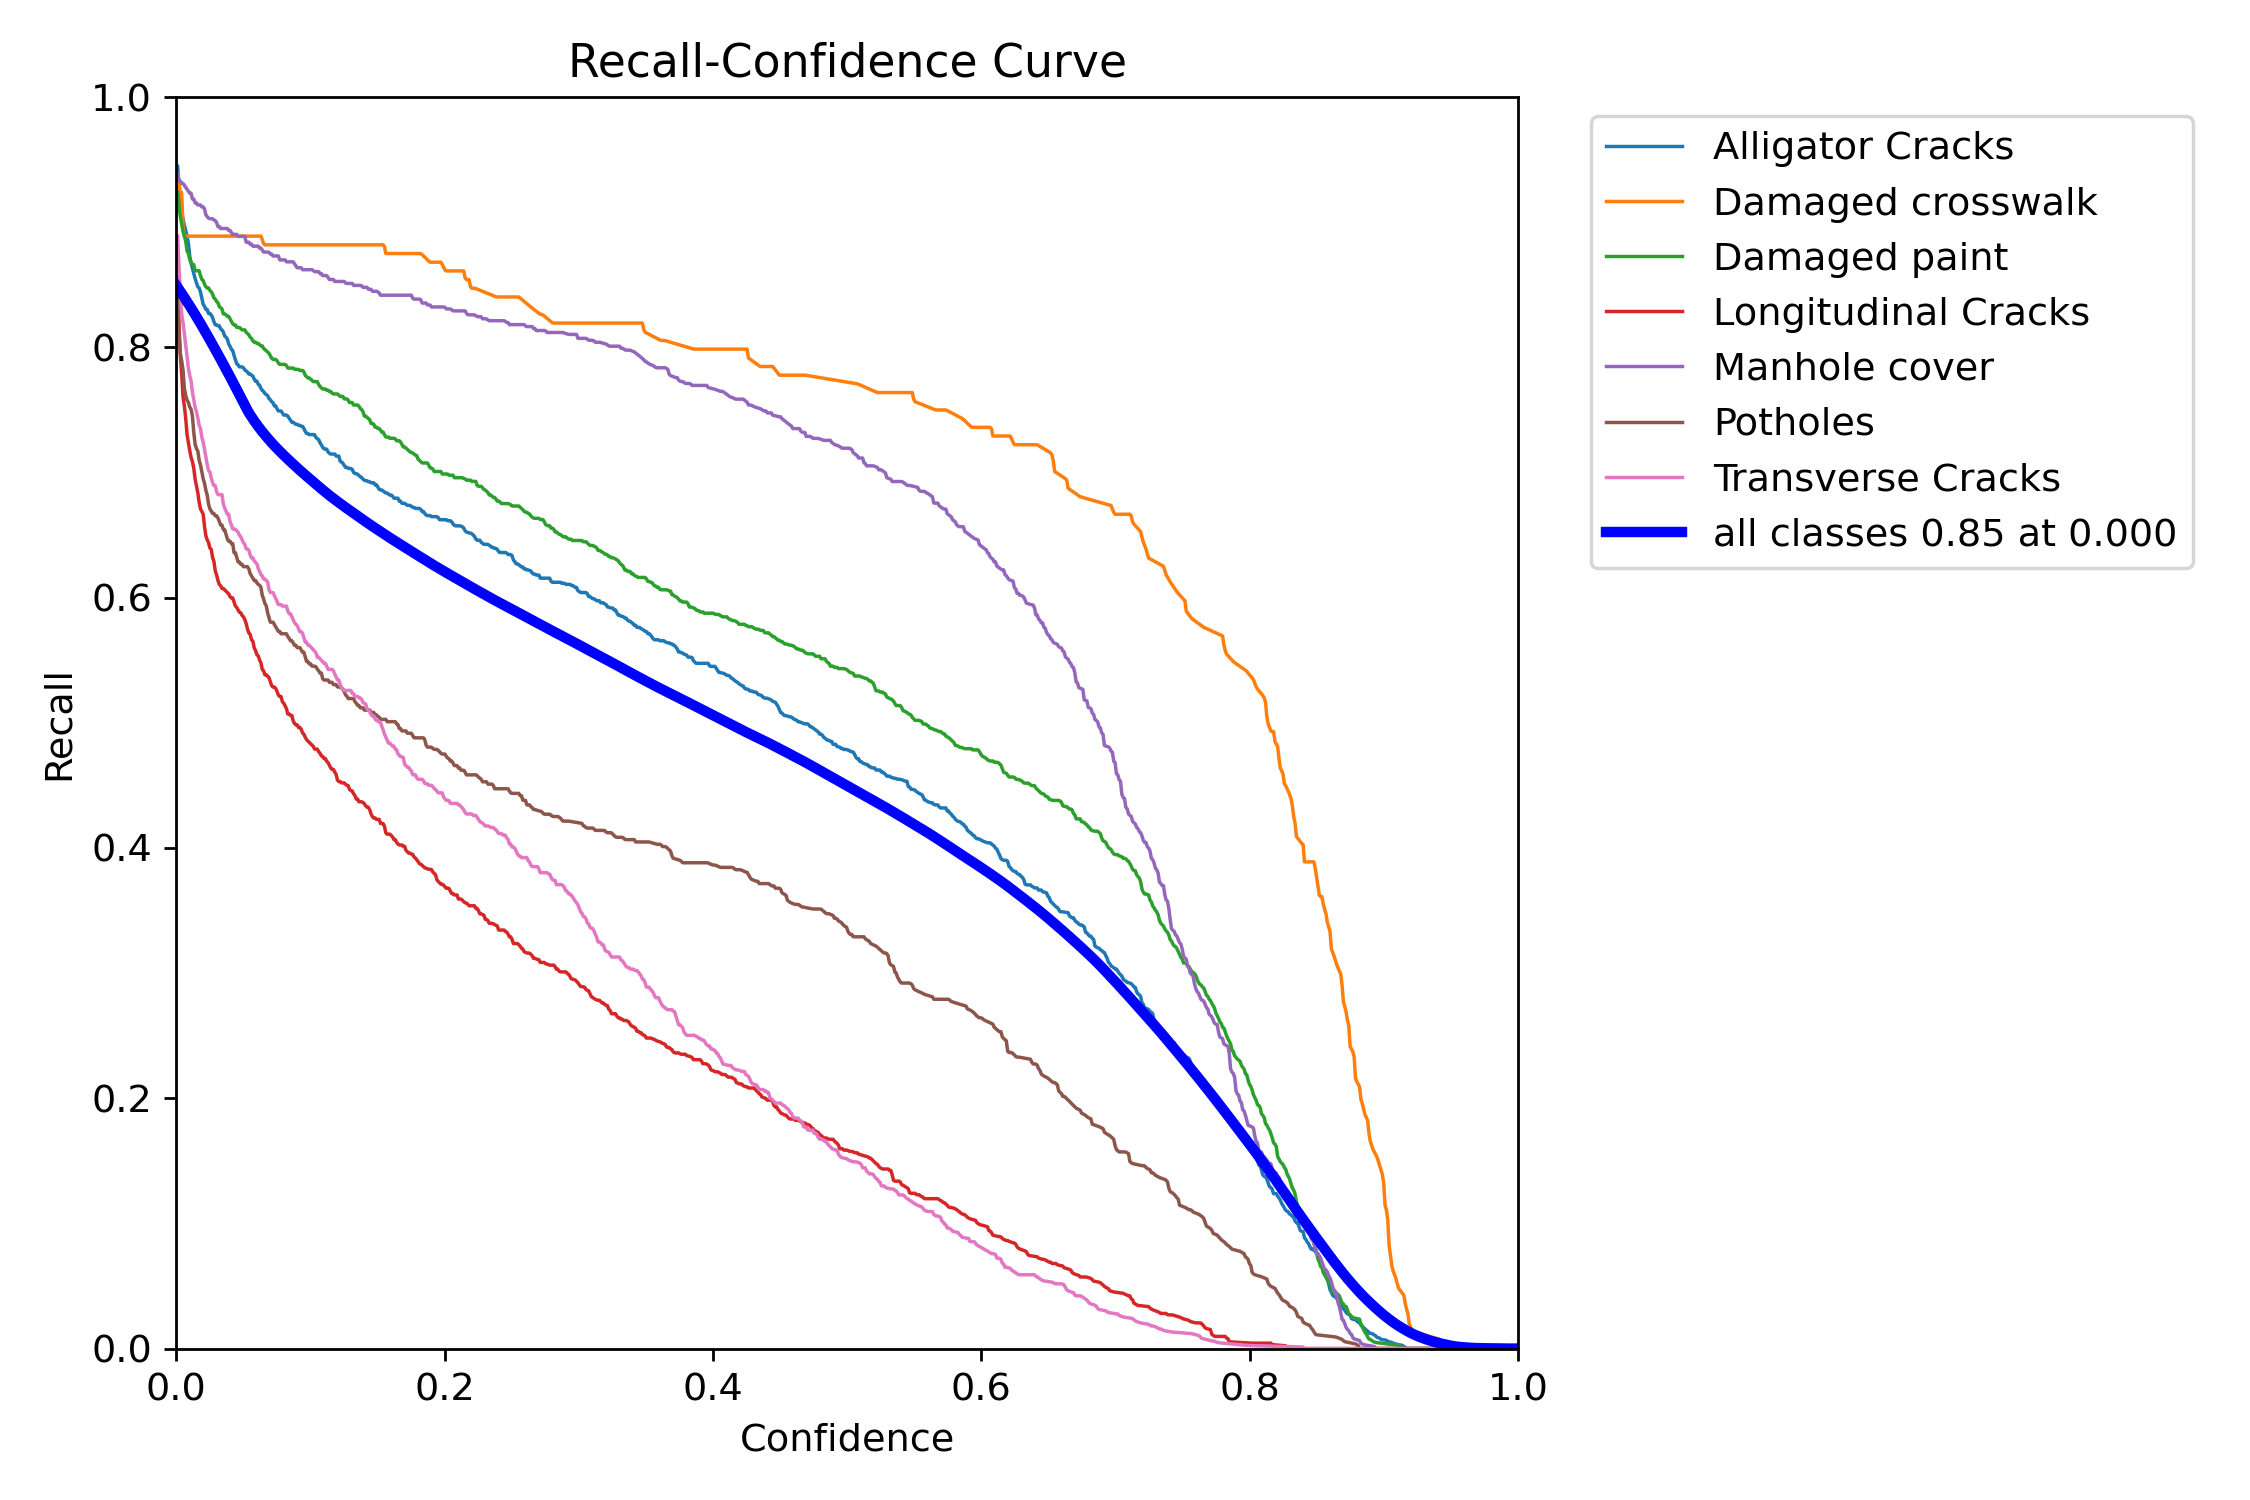

In [15]:
from IPython.display import Image, display

base = "/content/runs/detect/train"

display(Image(f"{base}/BoxP_curve.png", width=600))
display(Image(f"{base}/BoxR_curve.png", width=600))


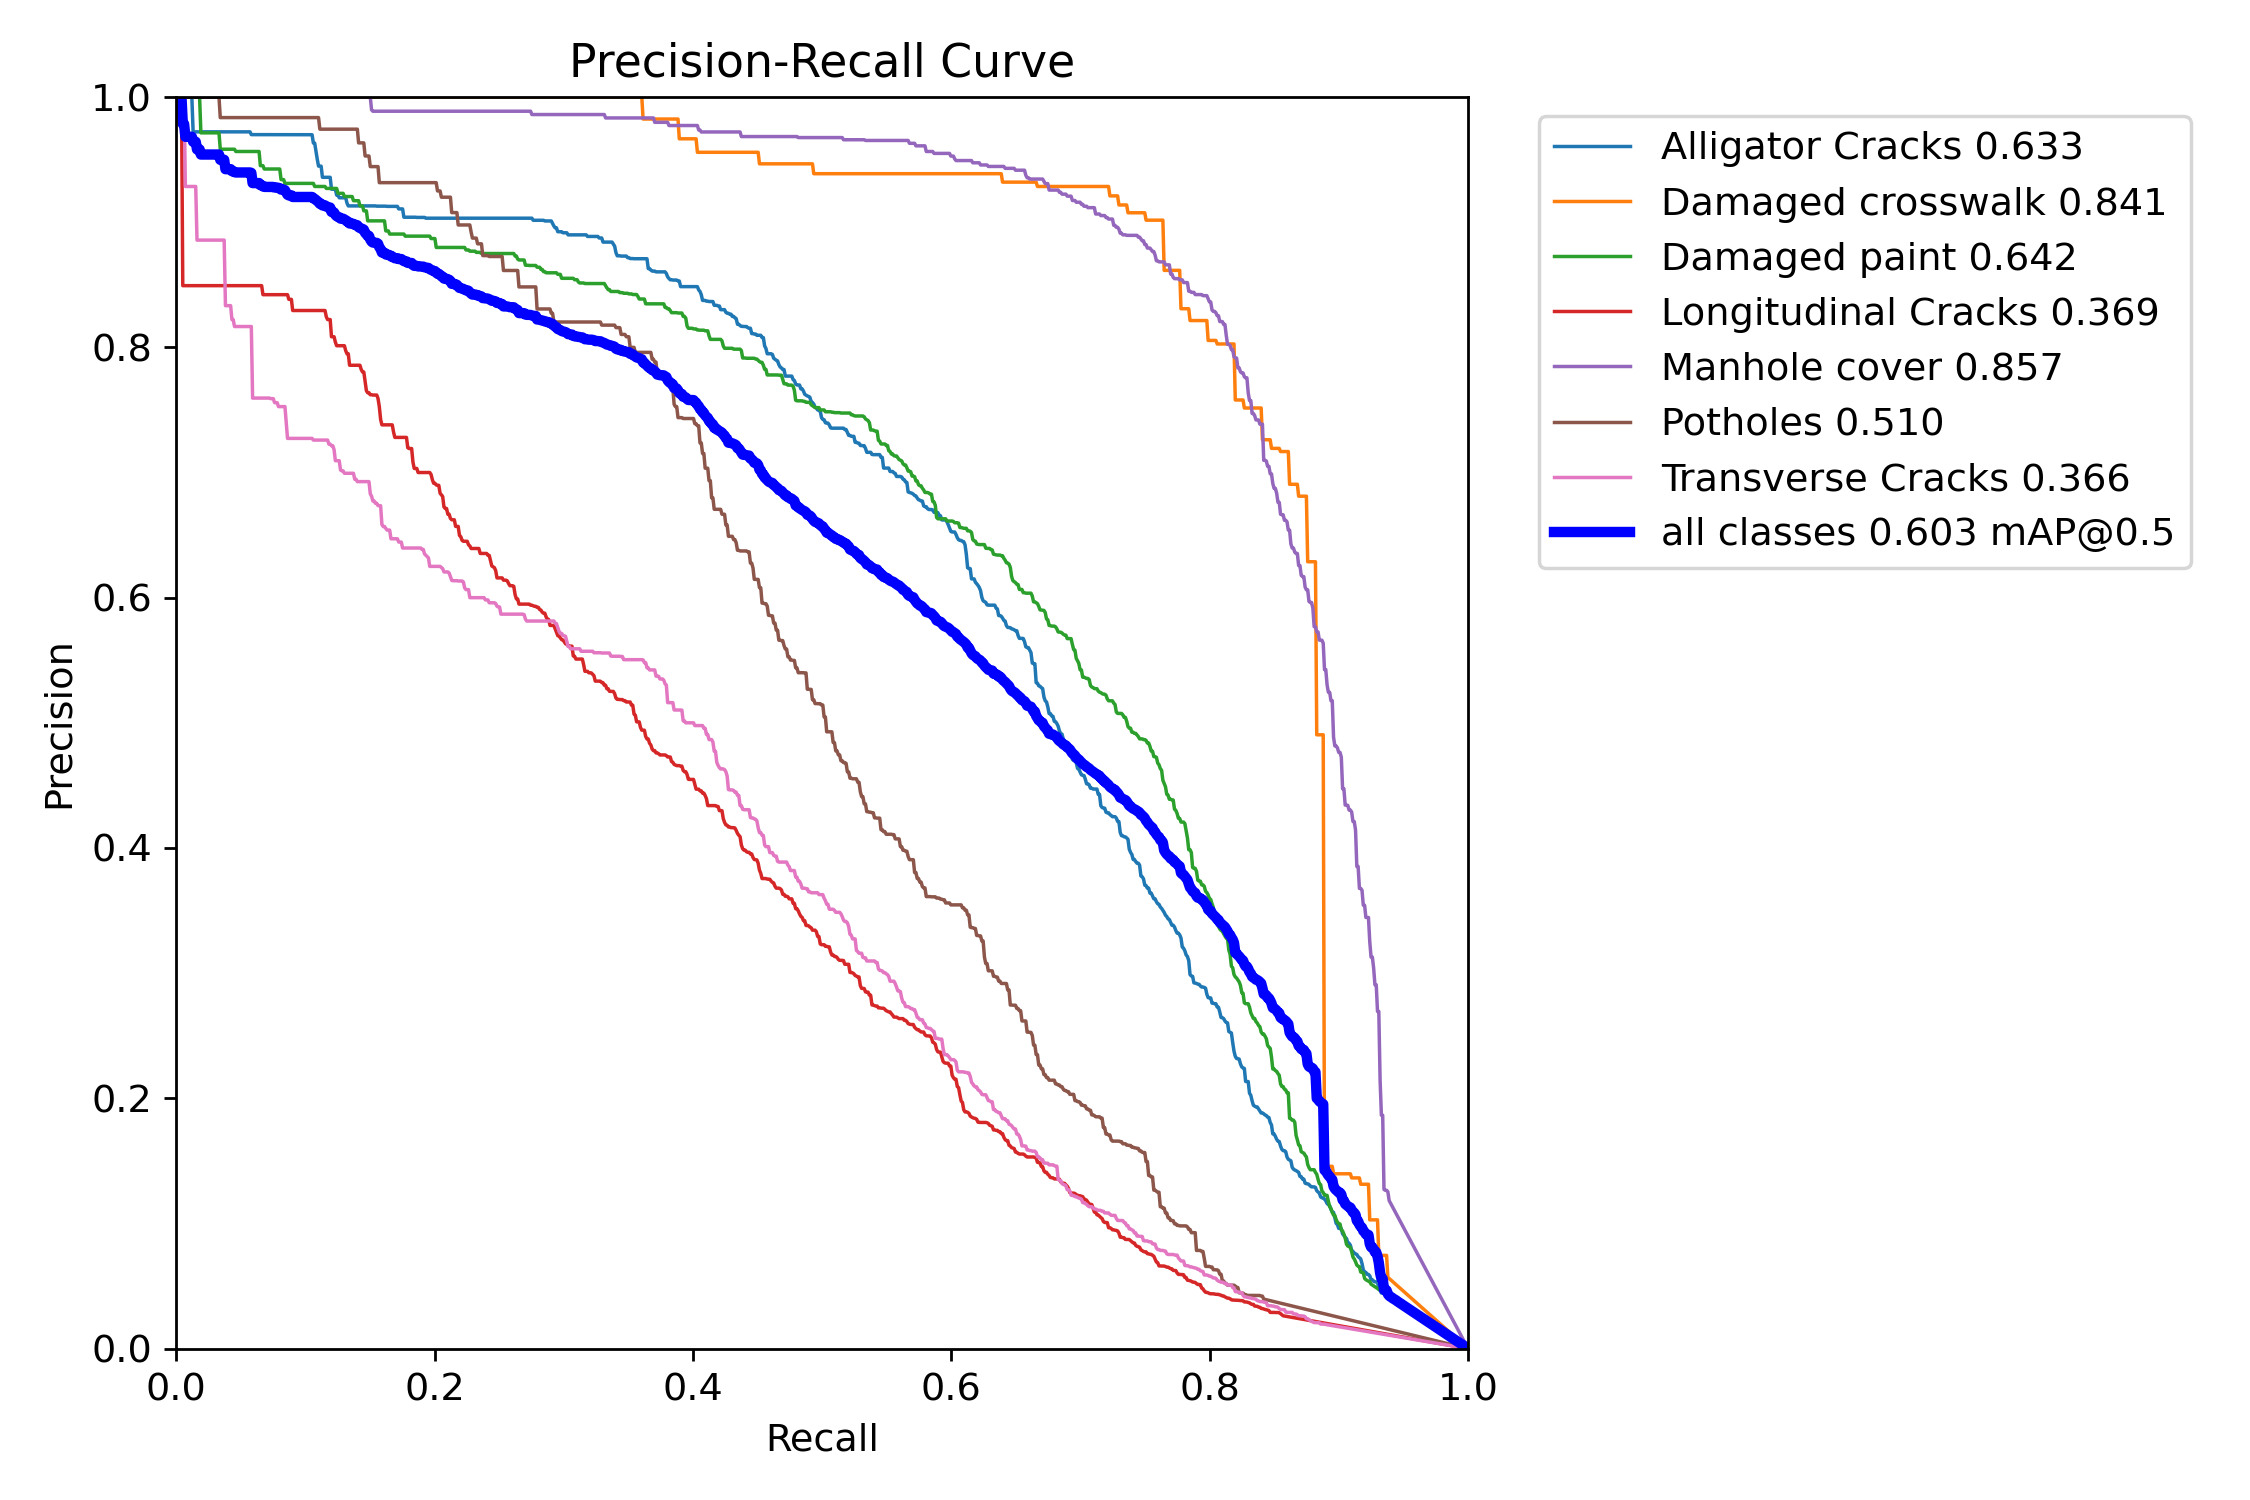

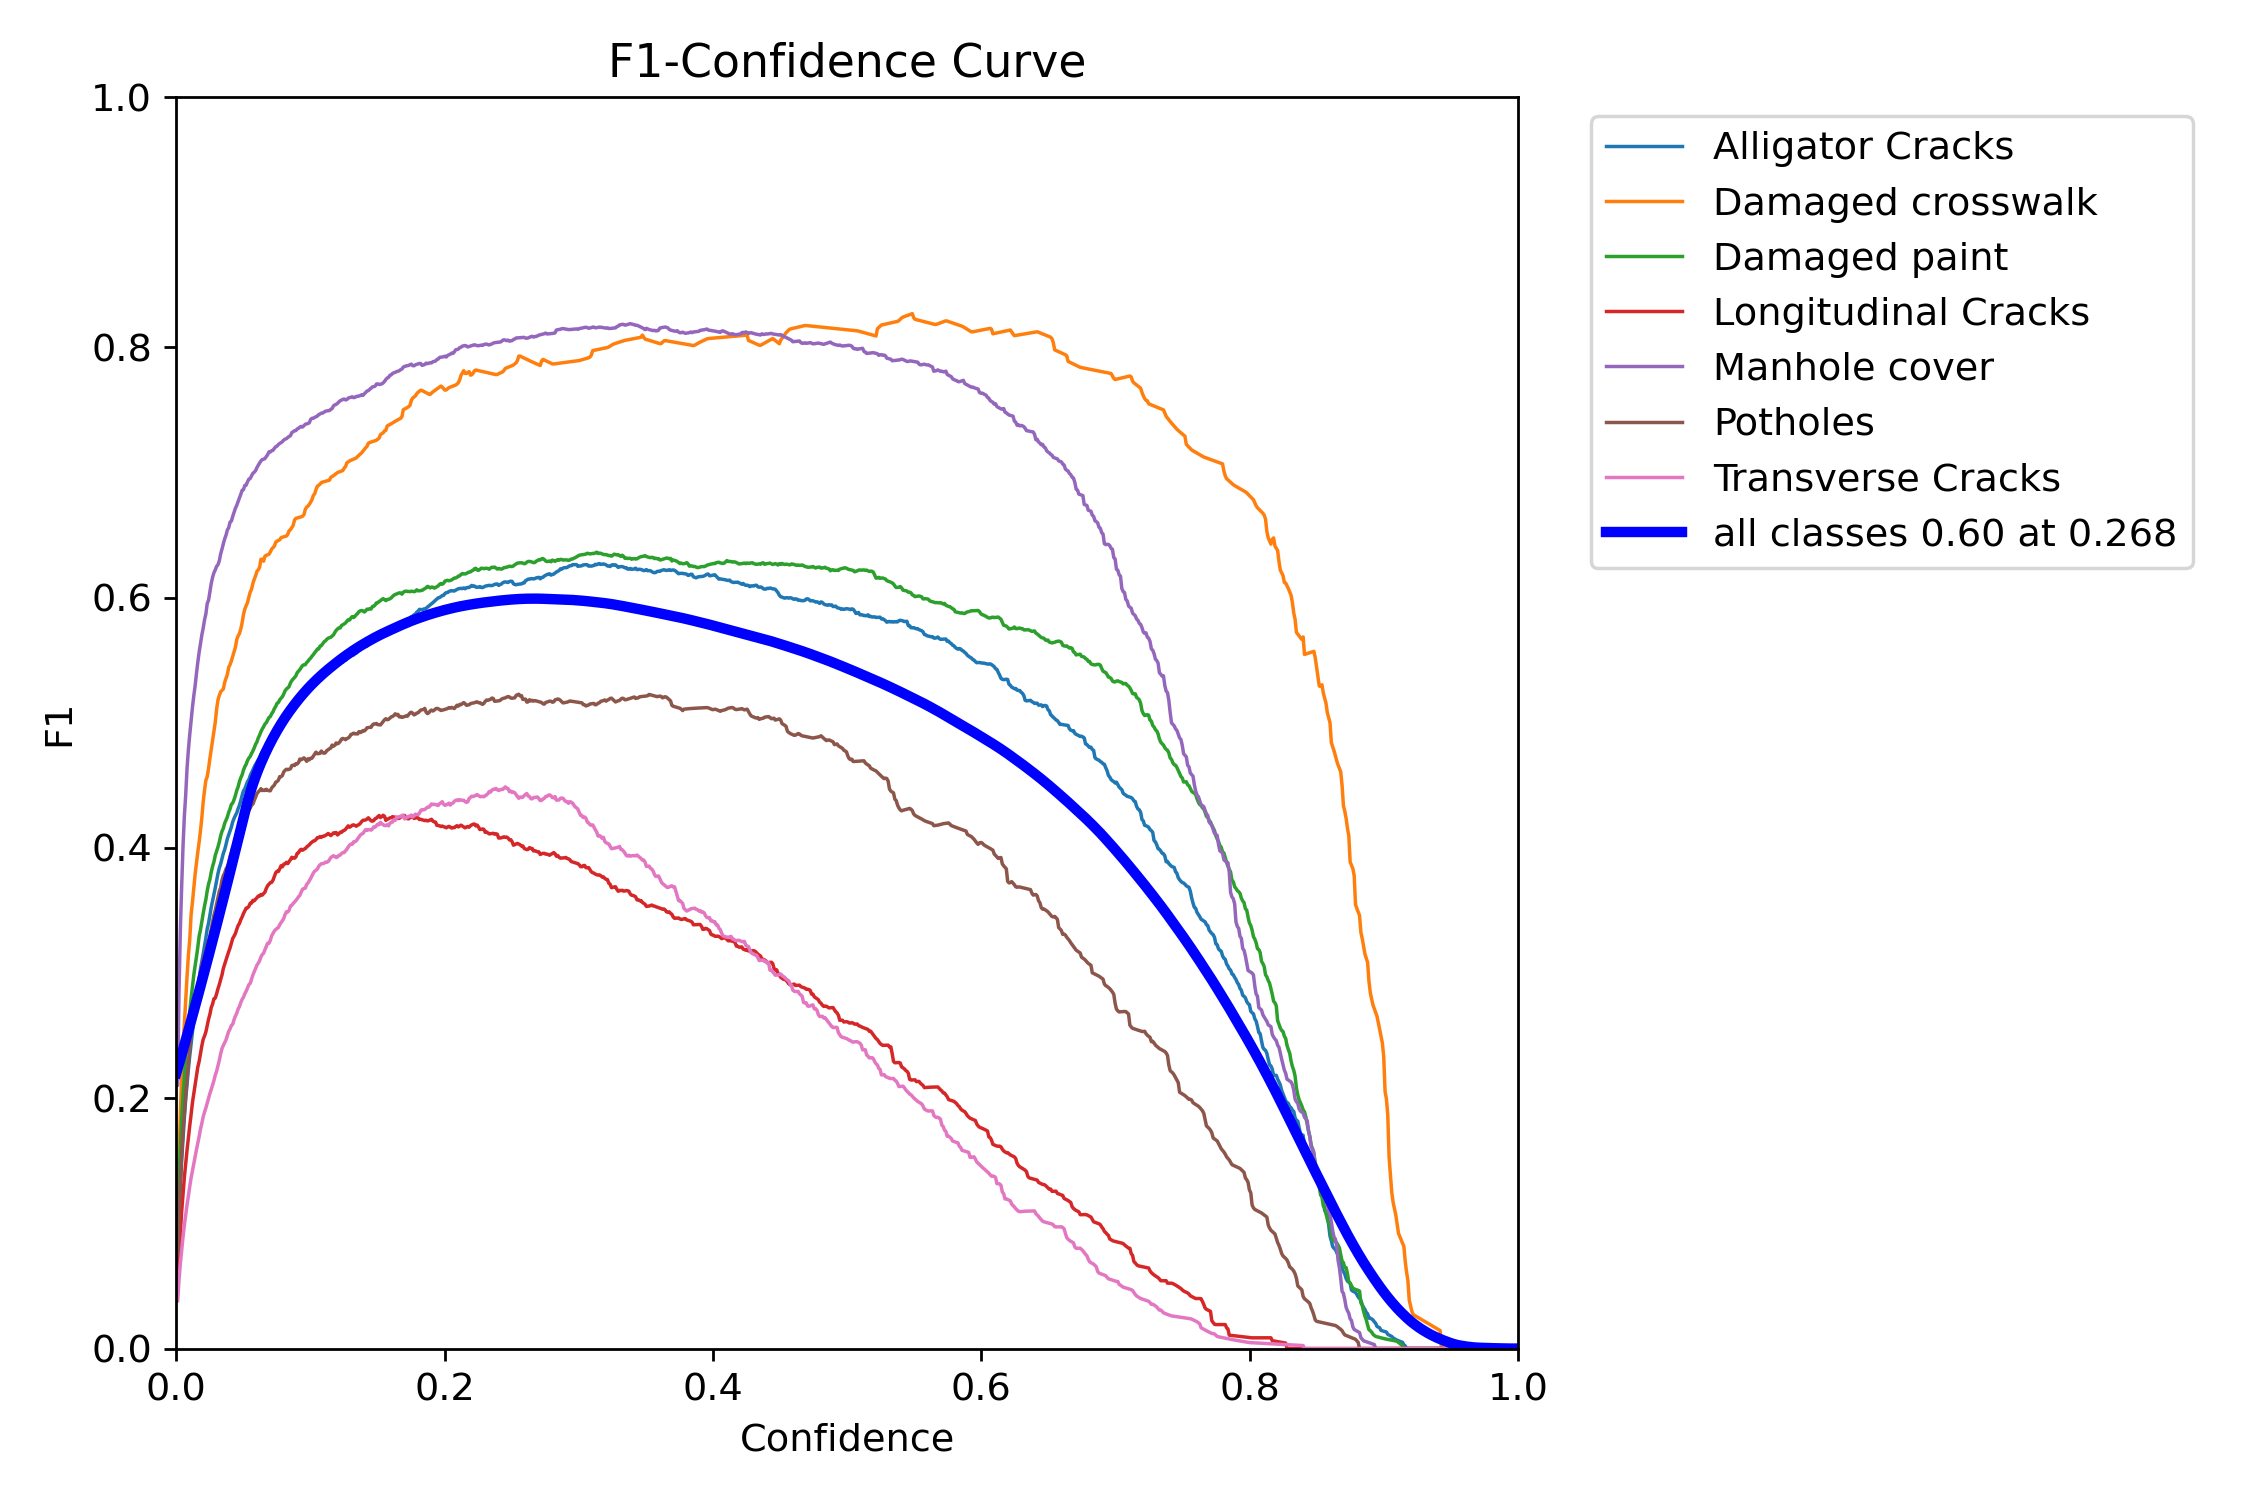

In [16]:
display(Image(f"{base}/BoxPR_curve.png", width=600))
display(Image(f"{base}/BoxF1_curve.png", width=600))

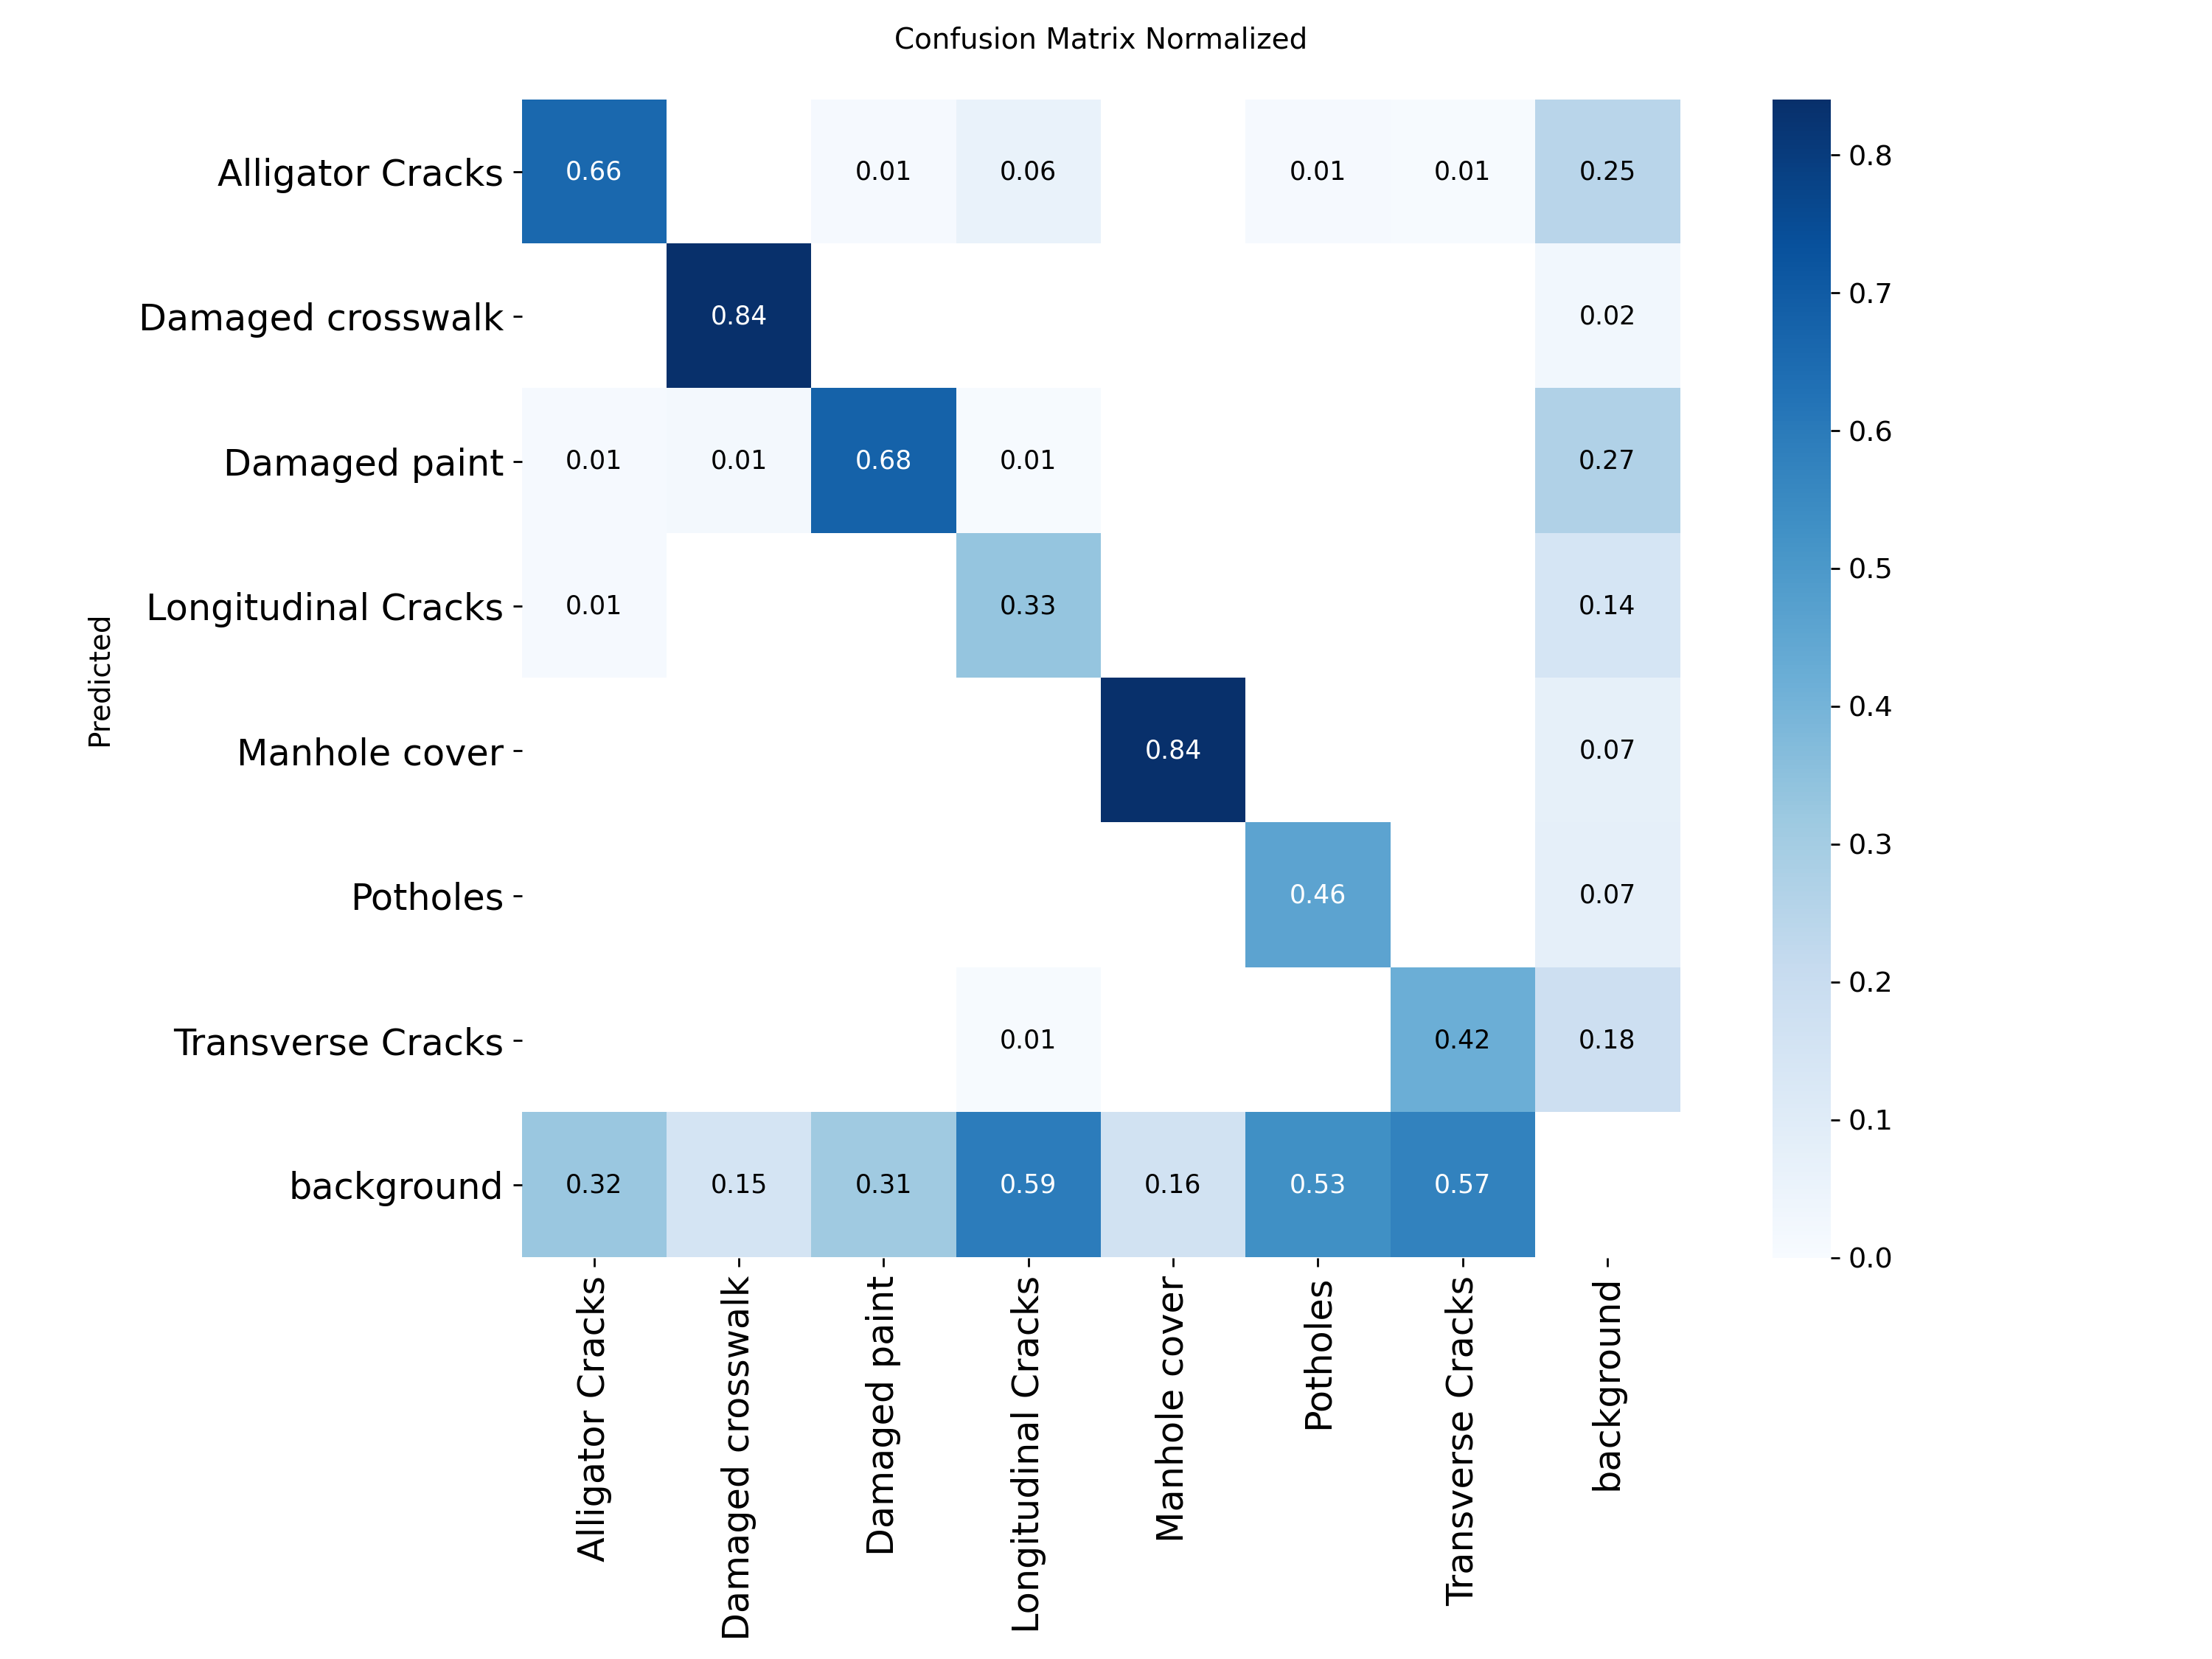

In [17]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

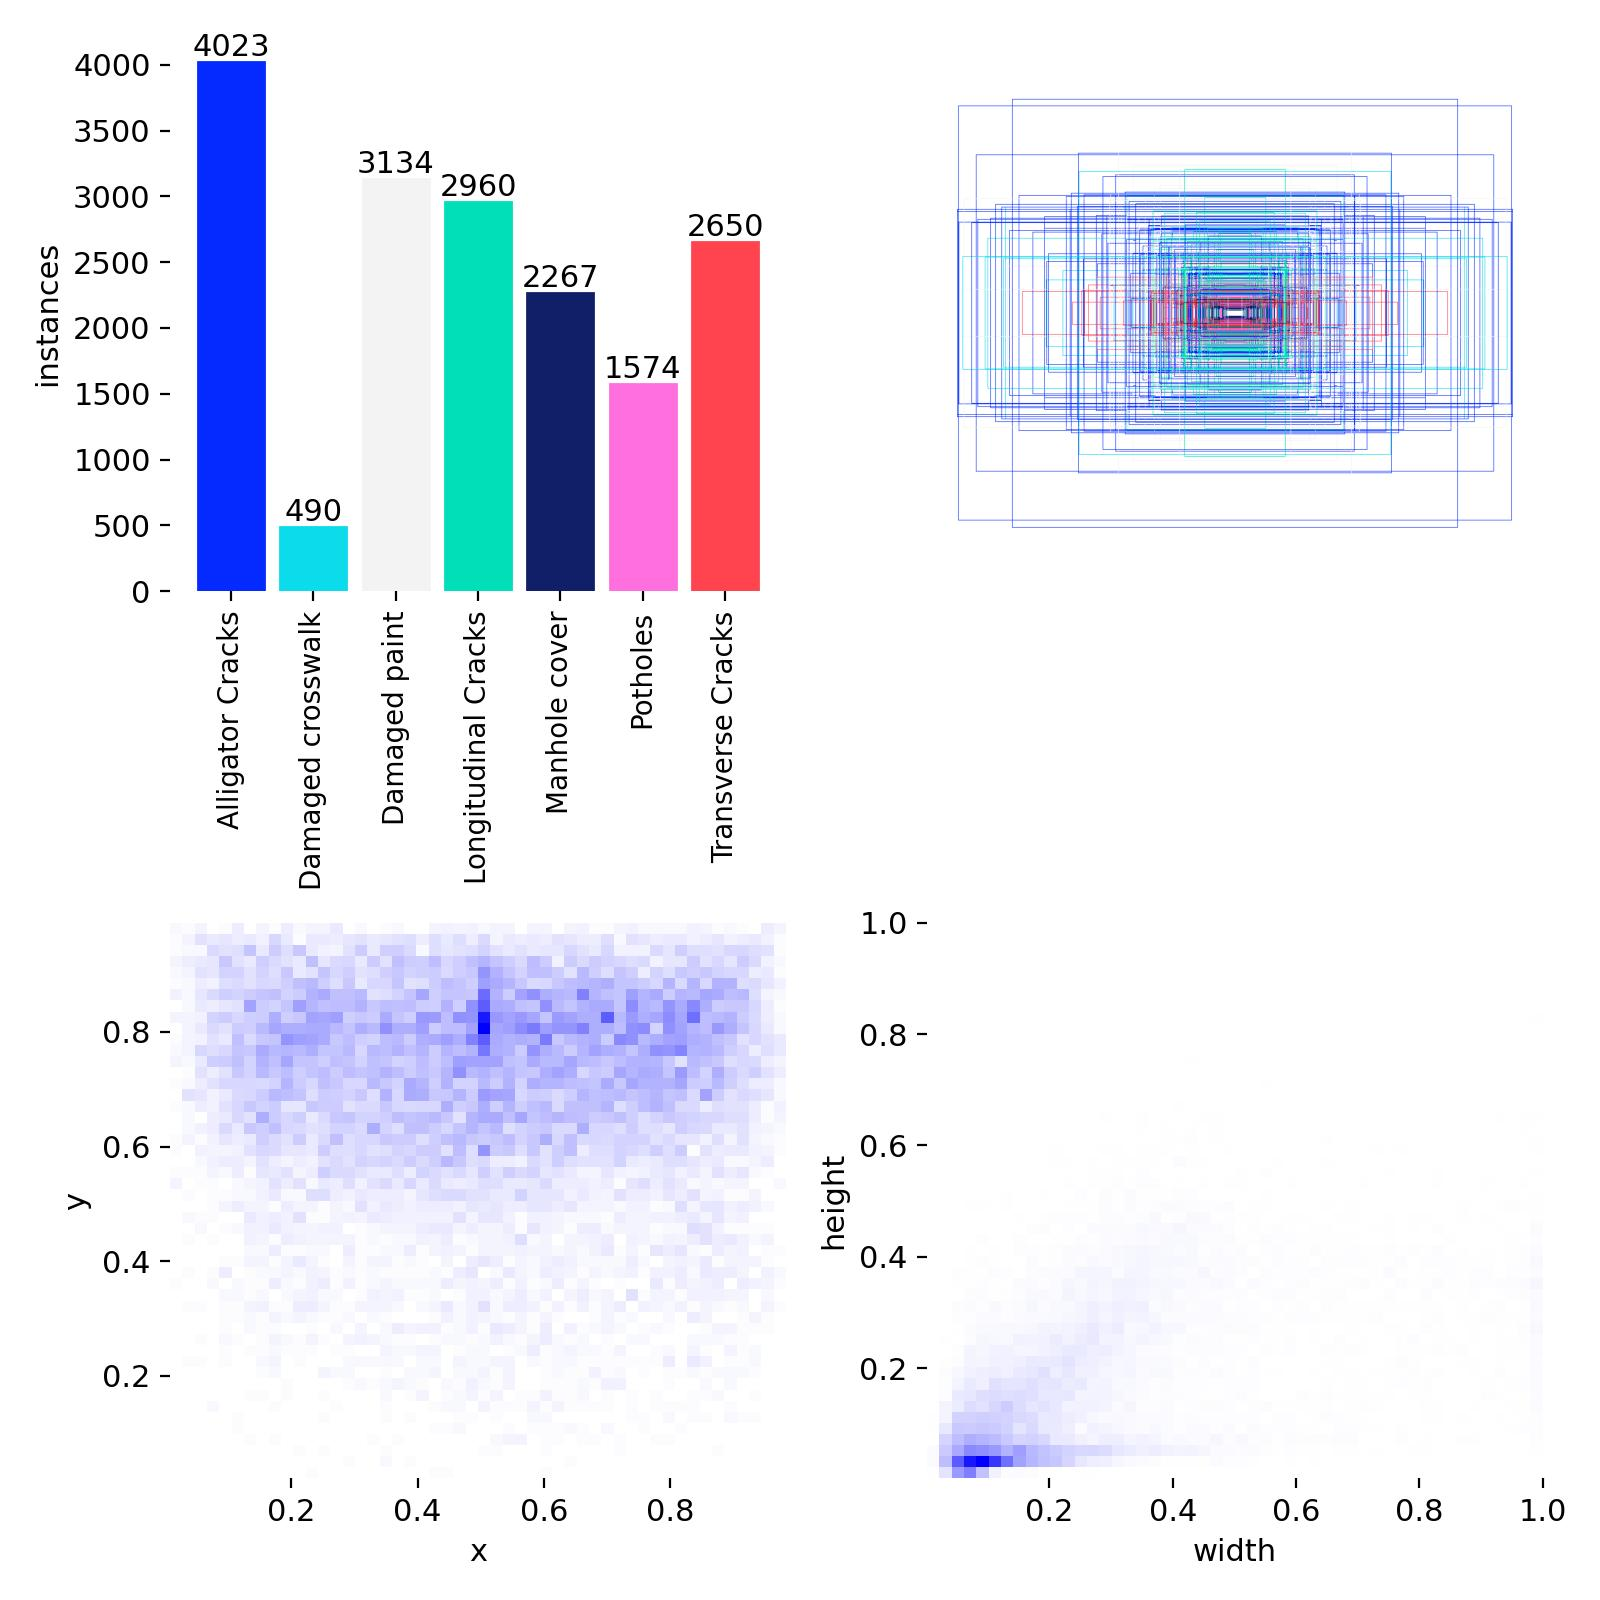

In [18]:
Image("/content/runs/detect/train/labels.jpg", width=600)

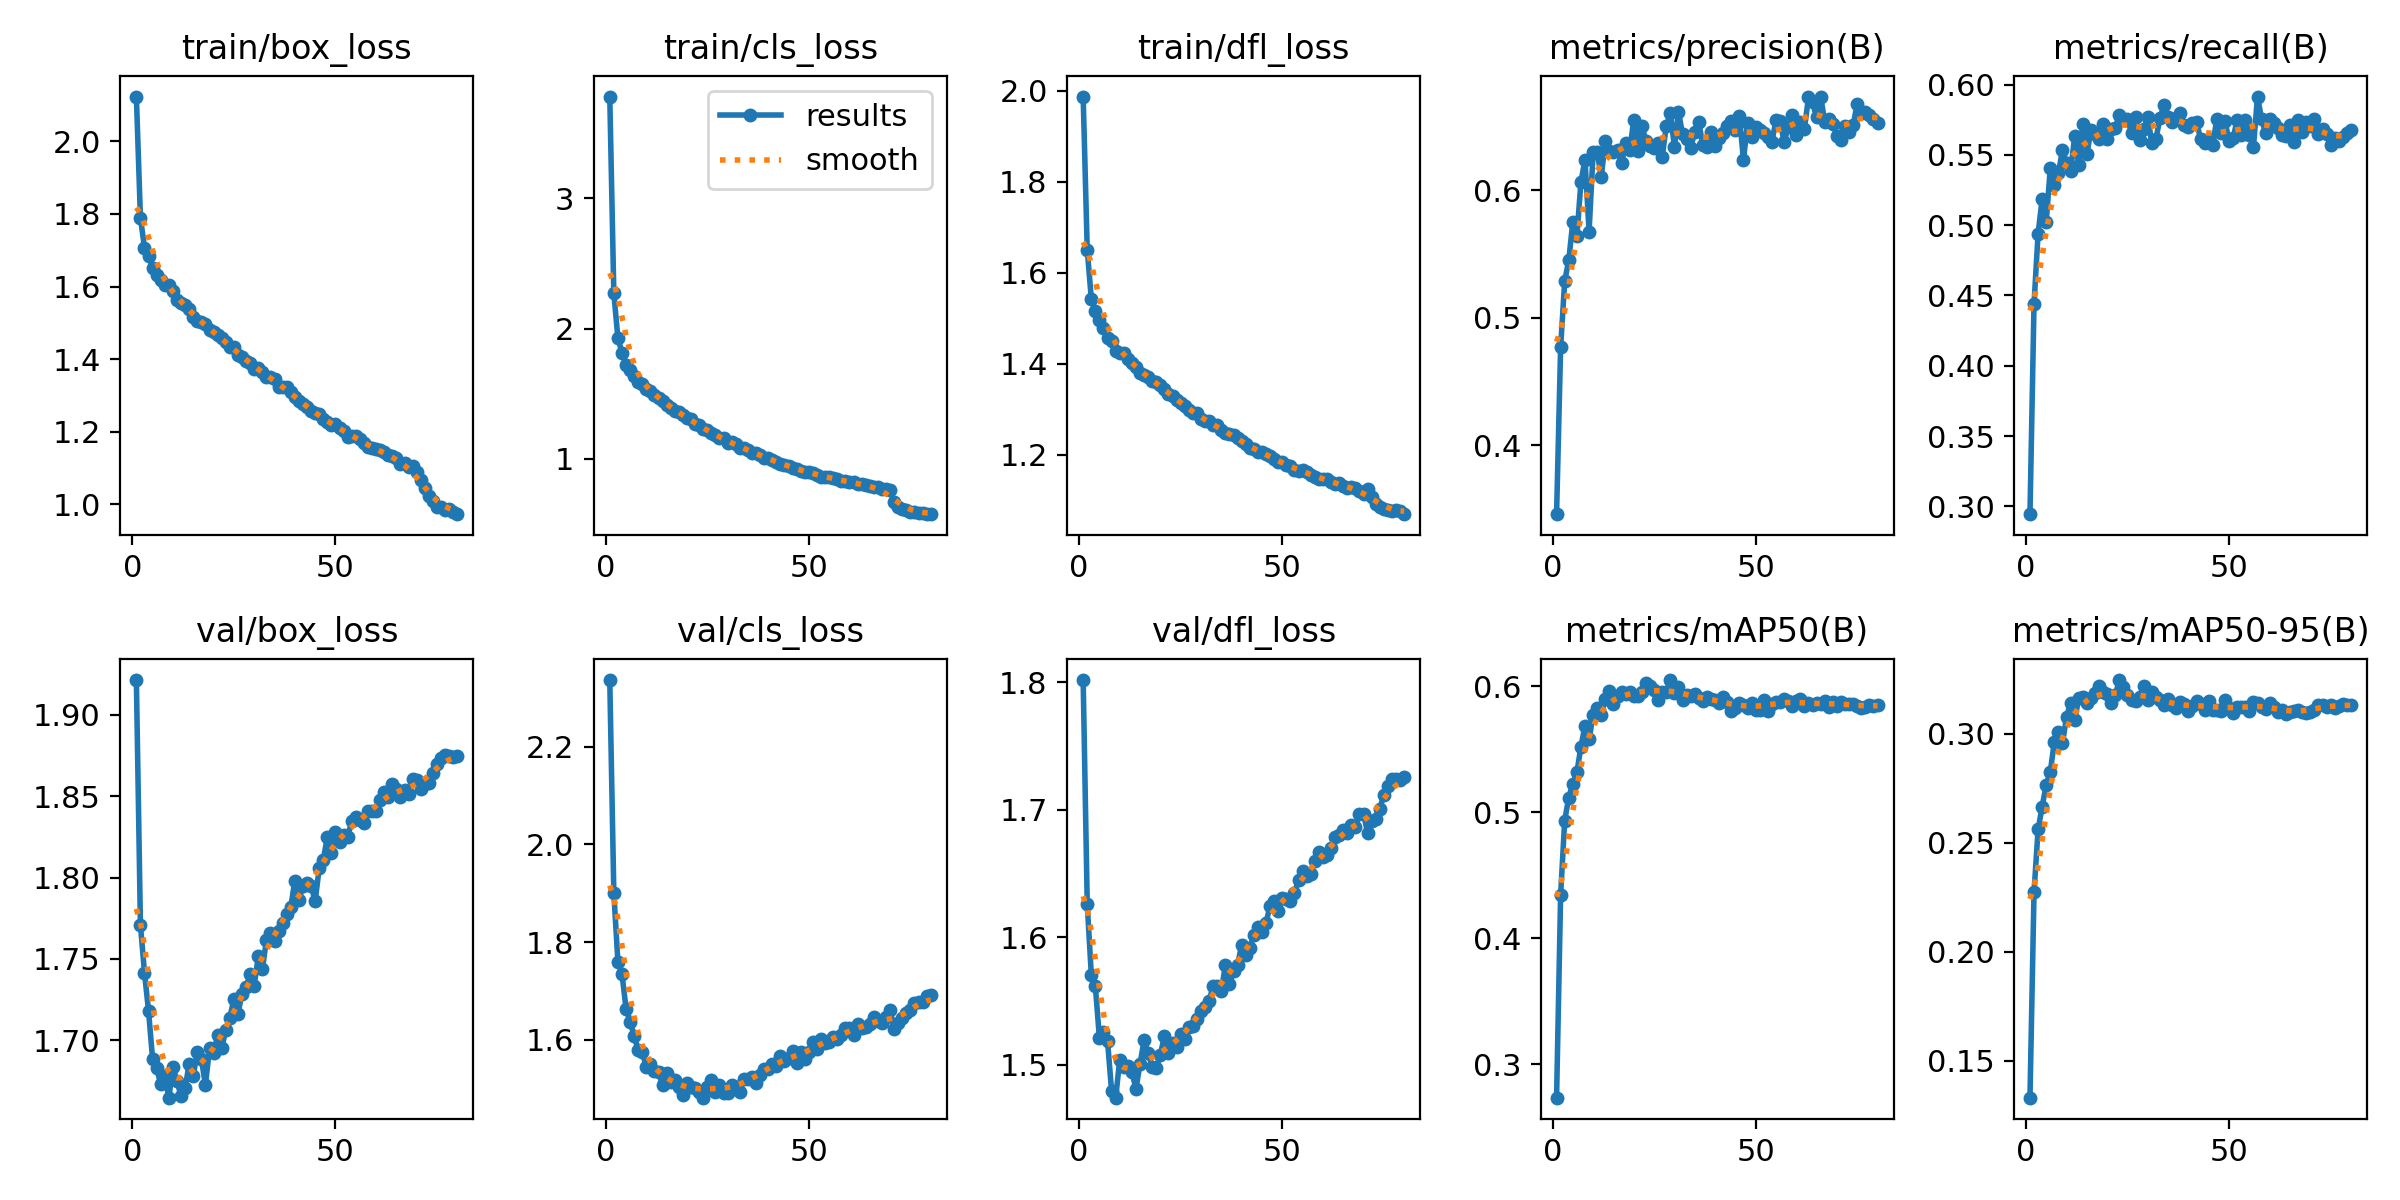

In [19]:
Image("/content/runs/detect/train/results.png", width=600)

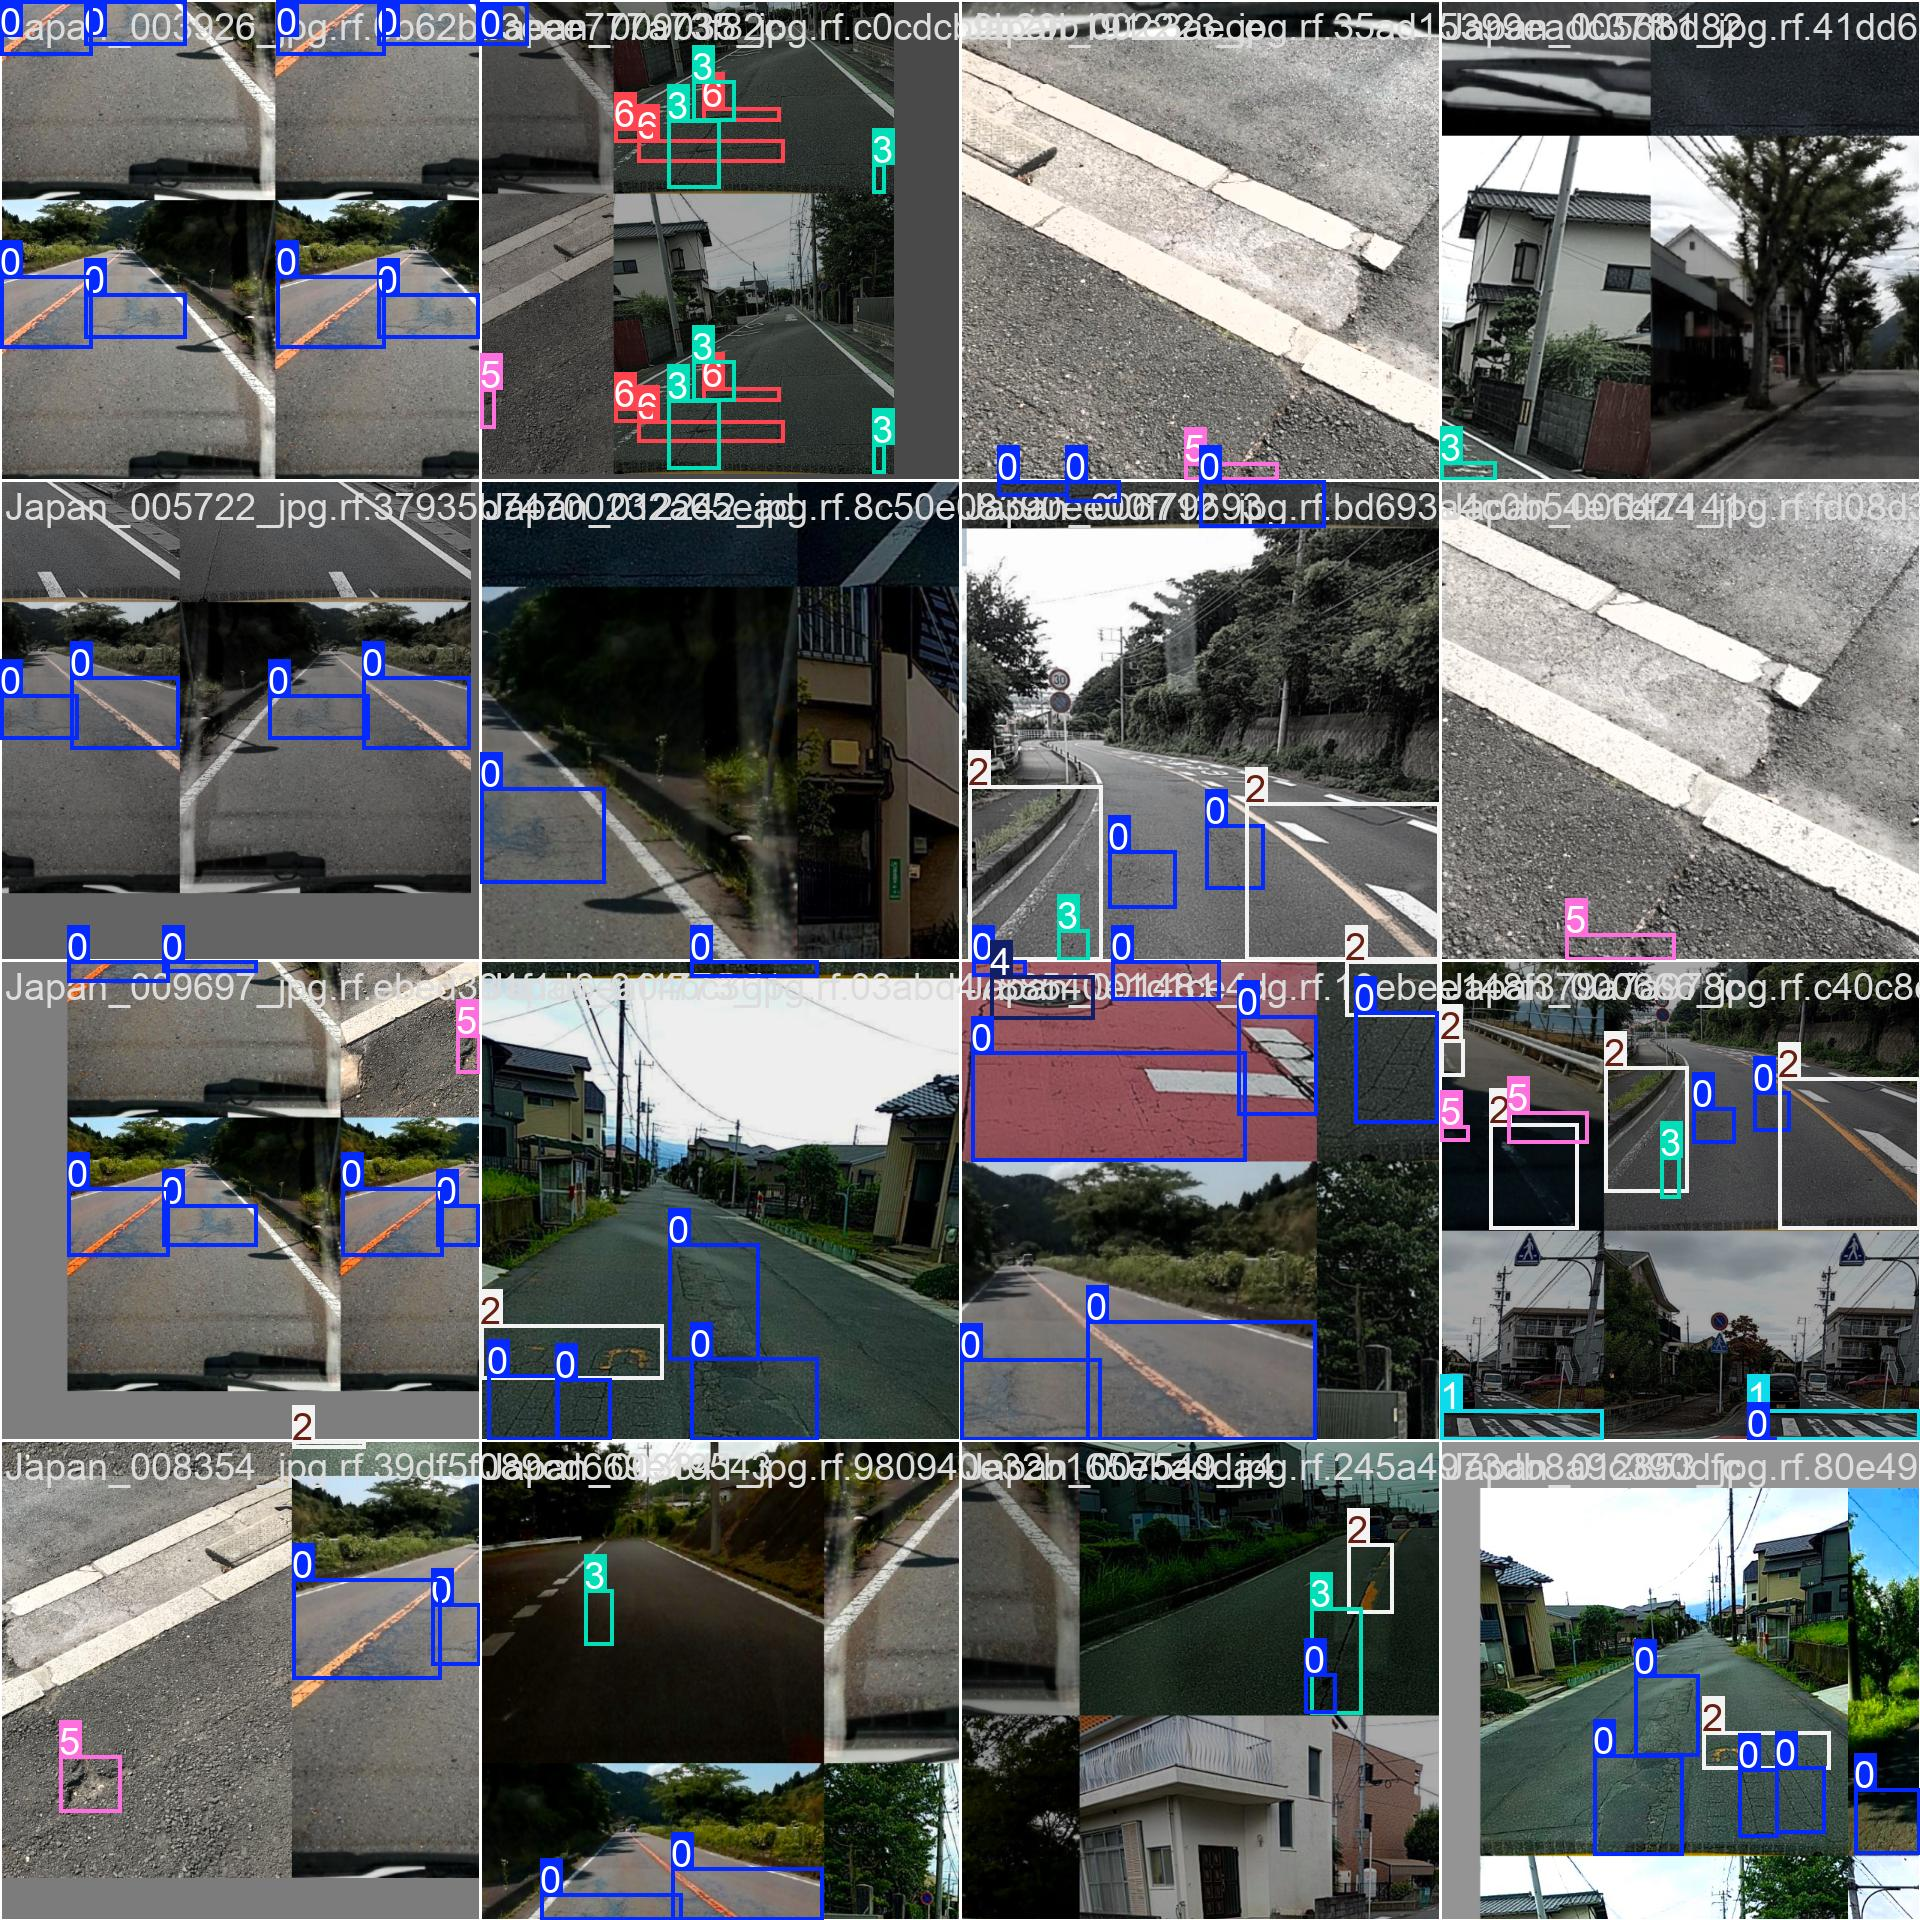

In [20]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

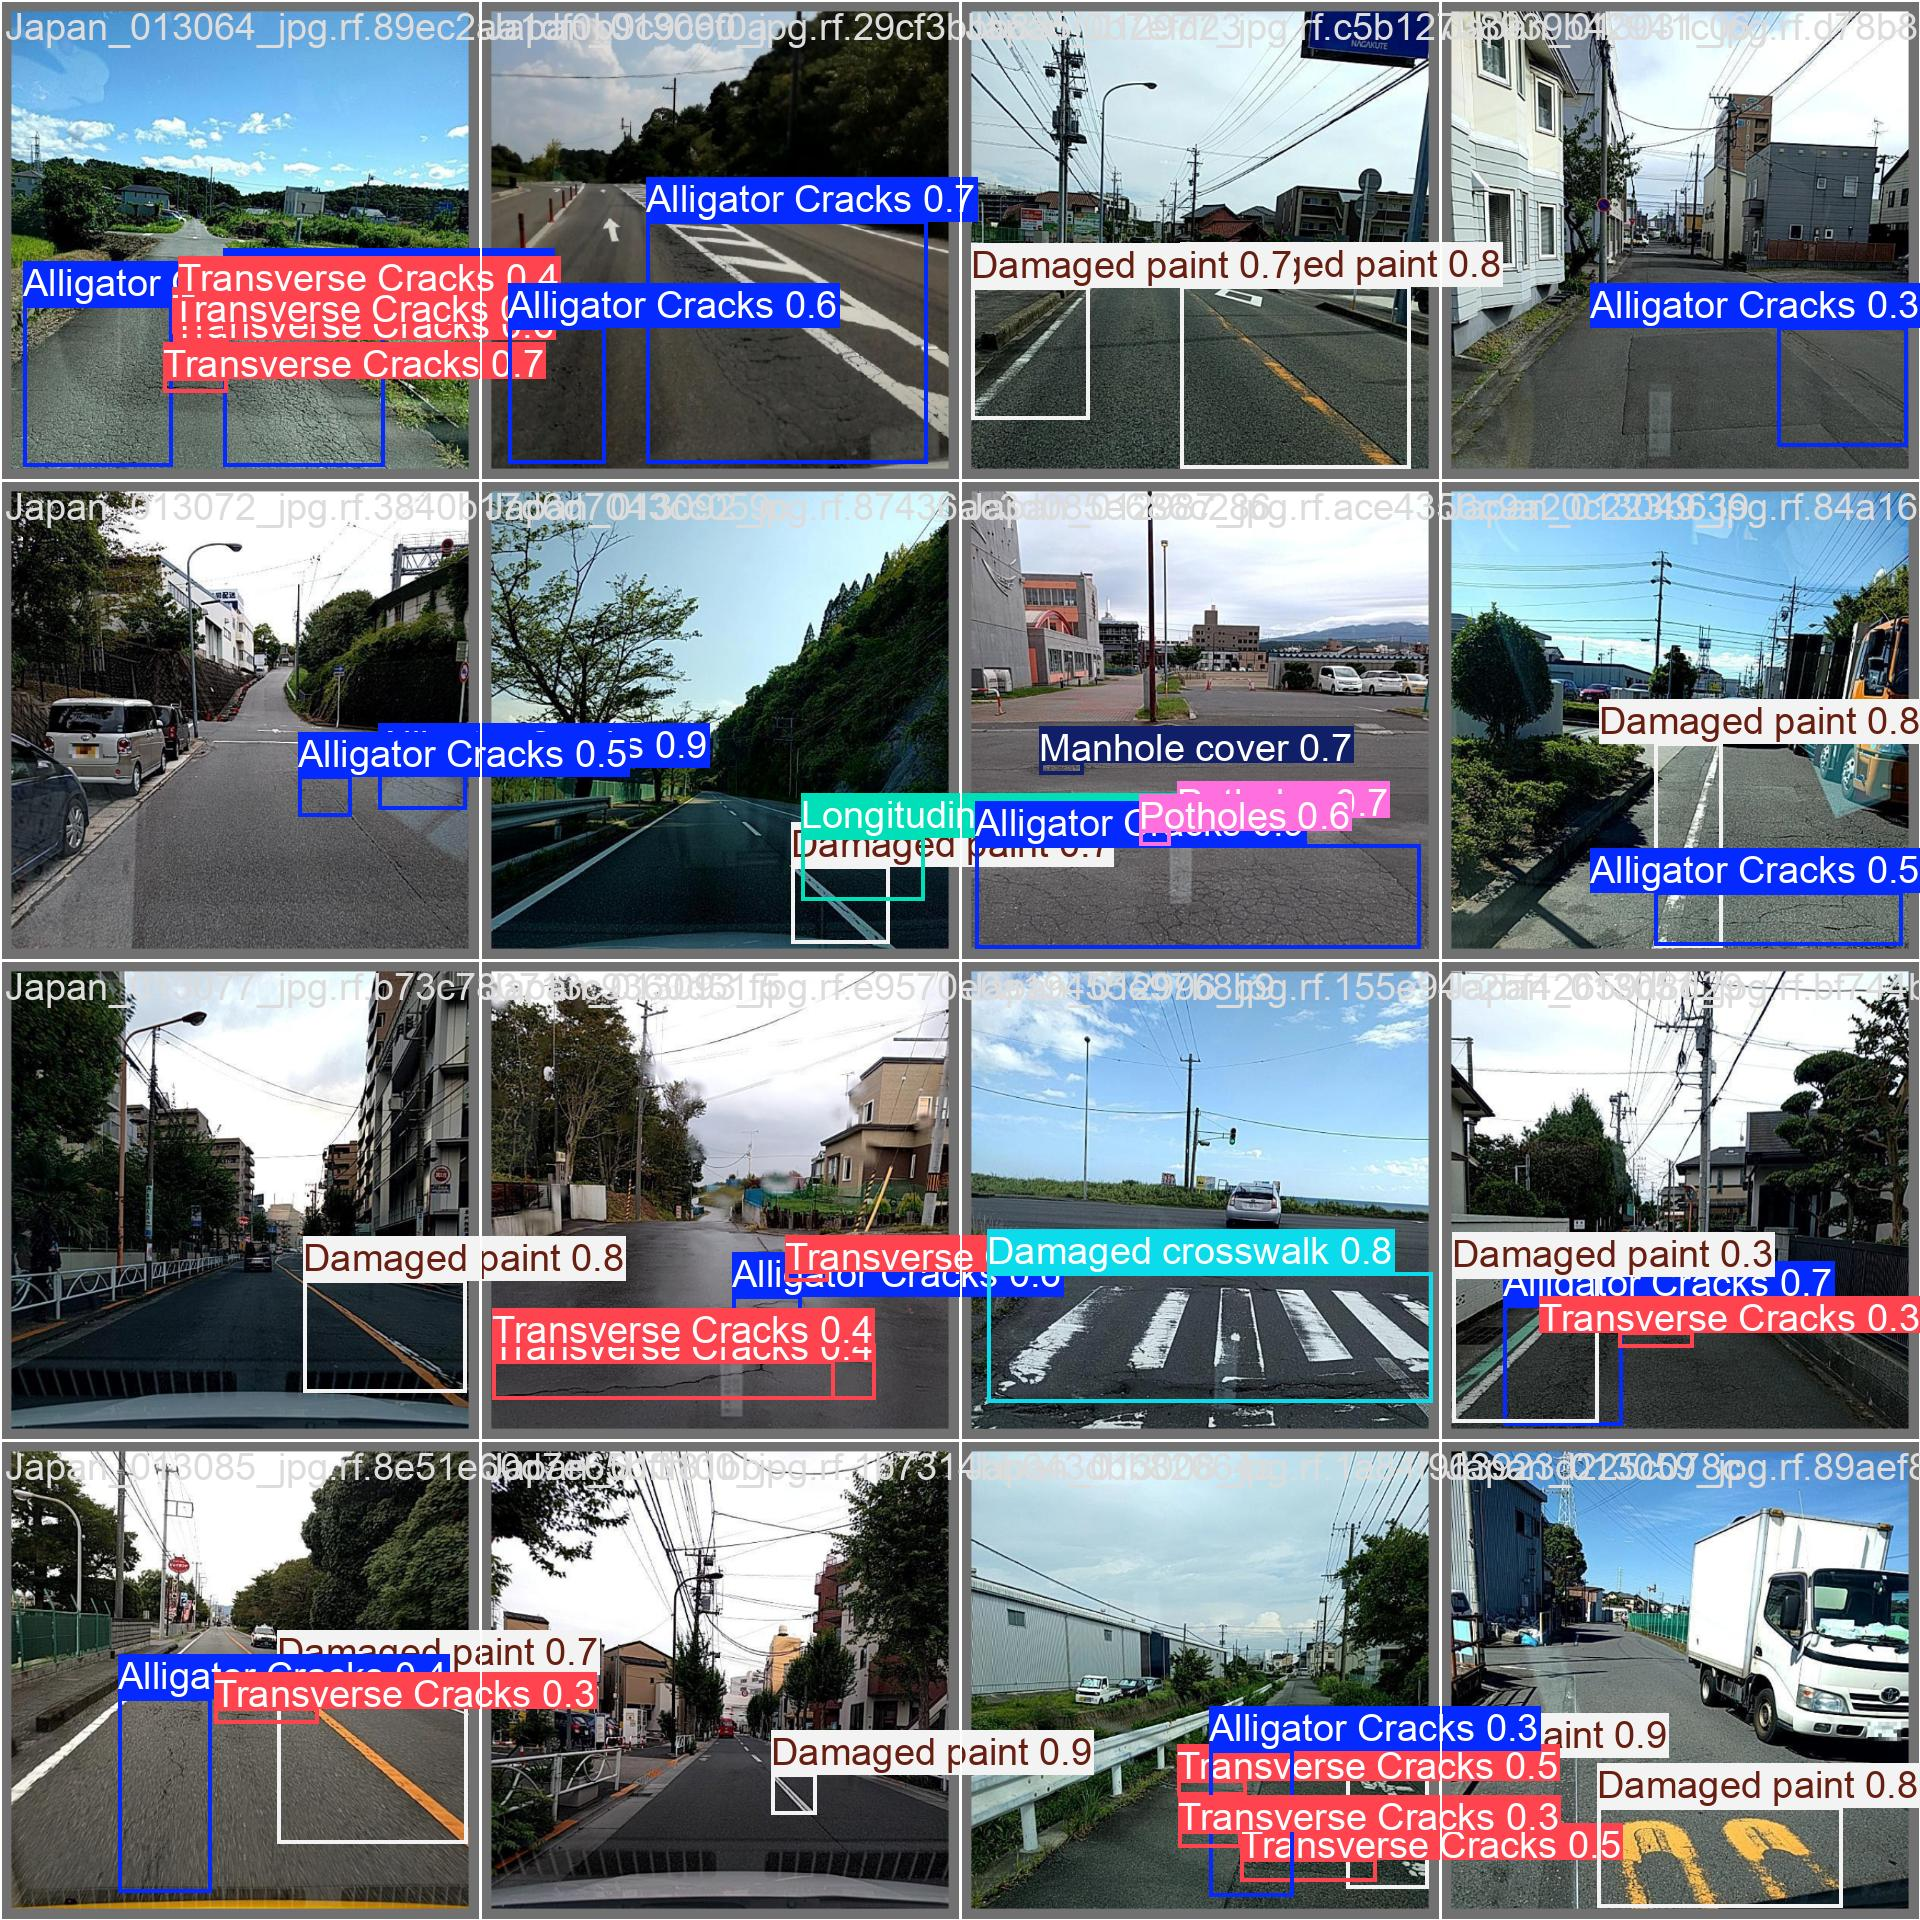

In [21]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

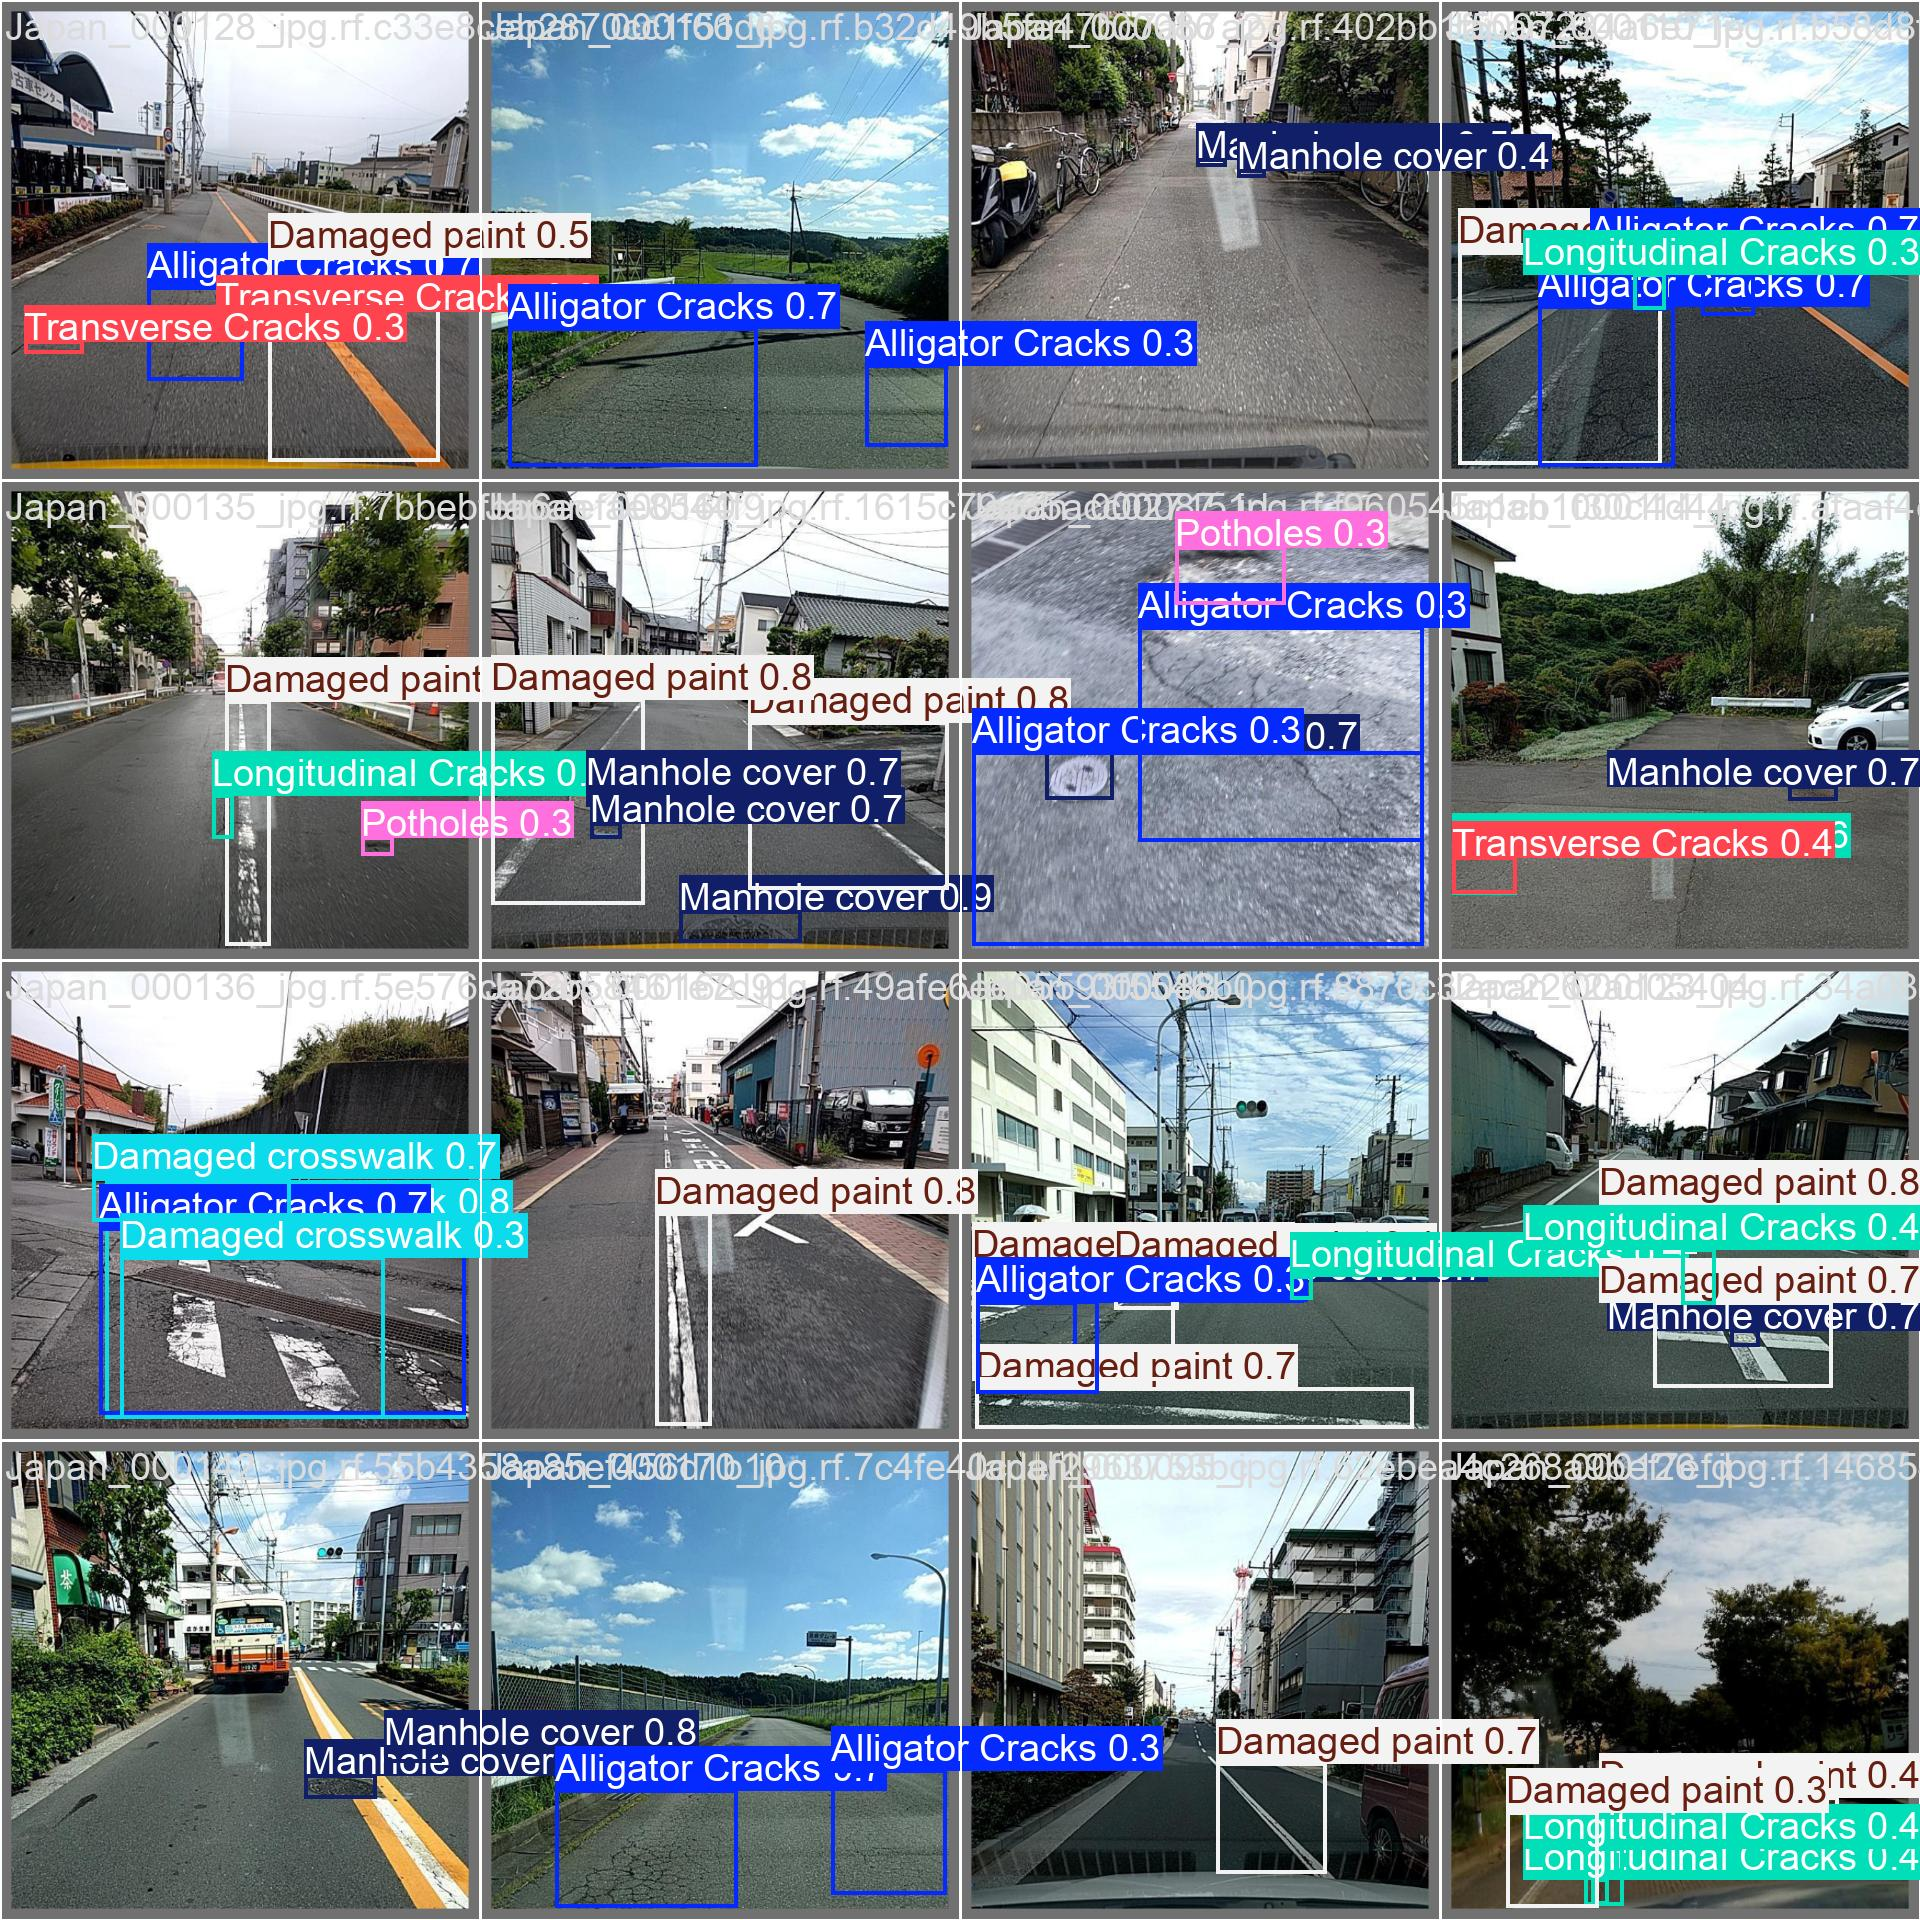

In [22]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

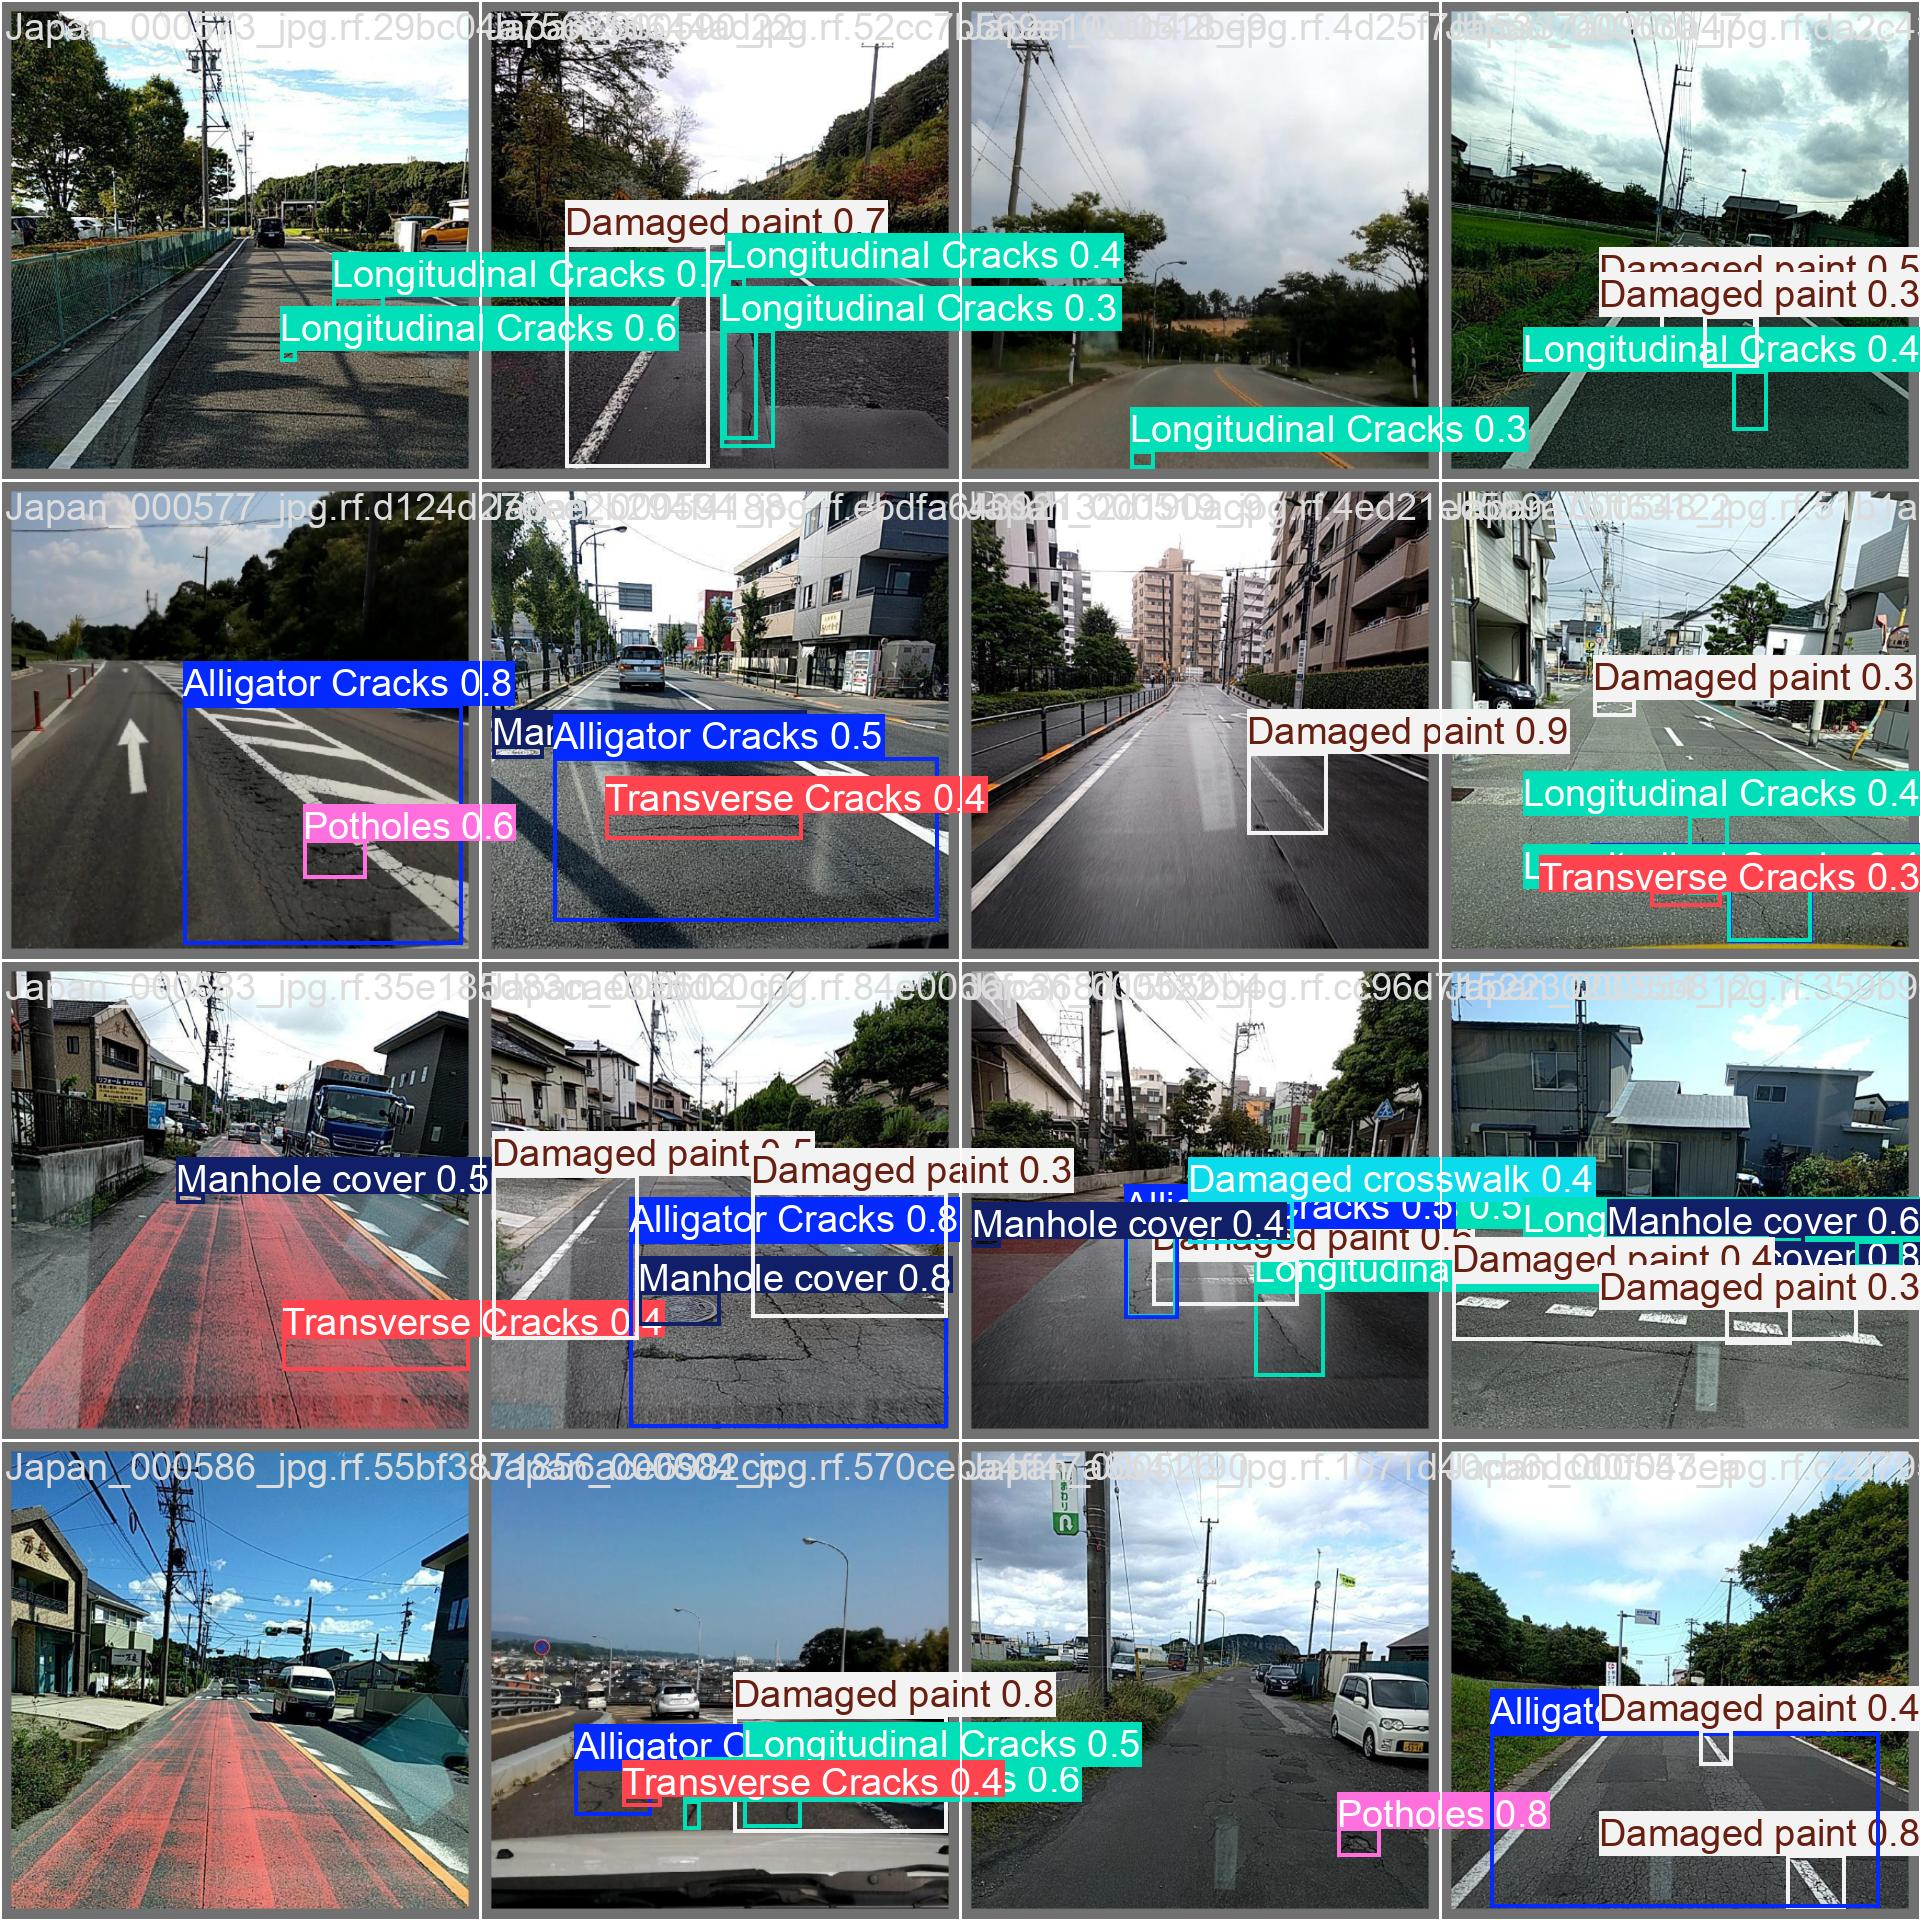

In [23]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=600)

**Step # 06  Validate Fine-Tuned Model**

In [24]:
!yolo task=detect mode=val model={base}/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 101 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2840.0±628.9 MB/s, size: 80.6 KB)
val: Scanning /content/Road-damage-detection-10/valid/labels.cache... 1797 images, 29 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1797/1797 289.9Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 113/113 4.4it/s 25.5s
                   all       1797       5317      0.639      0.581      0.604      0.325
      Alligator Cracks        905       1220      0.611      0.618      0.633      0.327
     Damaged crosswalk        130        144      0.749       0.83      0.841      0.553
         Damaged paint        724       1016      0.596      0.664      0.643      0.382
   Longitudinal Cracks        577        927      0.548      0.314       0.37      0.162
         Manhole cover

**Step # 07 Inference with Custom Model on Images**

In [25]:
!yolo task=detect mode=predict model={base}/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 101 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs

image 1/795 /content/Road-damage-detection-10/test/images/Japan_000002_jpg.rf.2aaeda05df992e5e488b13855eb7b02a.jpg: 640x640 1 Damaged crosswalk, 3 Manhole covers, 15.7ms
image 2/795 /content/Road-damage-detection-10/test/images/Japan_000023_jpg.rf.302164c8f9843776e5357e2393eb3c1d.jpg: 640x640 2 Potholess, 15.6ms
image 3/795 /content/Road-damage-detection-10/test/images/Japan_000032_jpg.rf.6f97520cbba1d1d7a50f6d4b30080b48.jpg: 640x640 2 Alligator Crackss, 1 Manhole cover, 15.5ms
image 4/795 /content/Road-damage-detection-10/test/images/Japan_000050_jpg.rf.3ed43fde1d24c421c06115767d6eea55.jpg: 640x640 1 Manhole cover, 1 Potholes, 2 Transverse Crackss, 15.5ms
image 5/795 /content/Road-damage-detection-10/test/images/Japan_000053_jpg.rf.600290653b16432f983d94709c3eb221.jpg: 640x640 1 Alligator Cracks, 1 Longitudinal Cracks, 1 

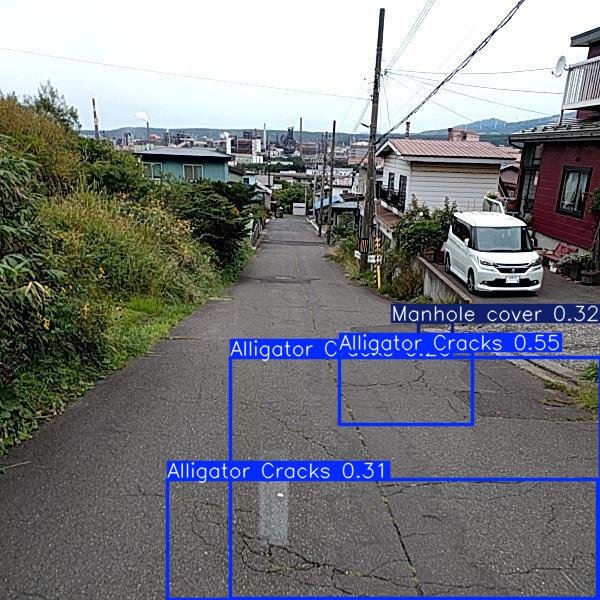

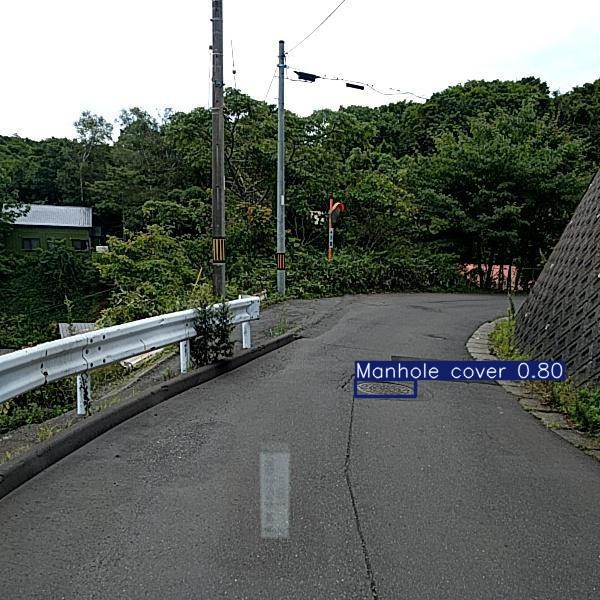

In [26]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [27]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
!zip -r predict_results.zip /content/runs/detect/predict
from google.colab import files
files.download('predict_results.zip')

  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/Japan_008651_jpg.rf.f78cee1ae55904f0e0bcba5ff8515175.jpg (deflated 4%)
  adding: content/runs/detect/predict/Japan_005247_jpg.rf.ab1b2ff9e71f9130183b2217f658a7e6.jpg (deflated 5%)
  adding: content/runs/detect/predict/Japan_012862_jpg.rf.d3722b218741aaef133ceebde1fc1a87.jpg (deflated 5%)
  adding: content/runs/detect/predict/Japan_010574_jpg.rf.c93cda3003c189209514194d2cf6d4df.jpg (deflated 4%)
  adding: content/runs/detect/predict/Japan_005045_jpg.rf.d63f95640baf2d8b58c70fbb5c651e2b.jpg (deflated 5%)
  adding: content/runs/detect/predict/Japan_006898_jpg.rf.5eaa1ae296556d2c590d8f8841ab39b0.jpg (deflated 4%)
  adding: content/runs/detect/predict/Japan_001642_jpg.rf.6e517e26901074acfcda09be7d465352.jpg (deflated 4%)
  adding: content/runs/detect/predict/Japan_006714_jpg.rf.82c52ea8982b7f8e6b1e97d4e28dacc2.jpg (deflated 4%)
  adding: content/runs/detect/predict/Japan_000752_jpg.rf.65219b6473e320703f7

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>